# <font color='Brown' >                Telecom Churn Case Study
   

### Problem statement:


In telecom industry, acquiring a new customer is 5-10 times more expensive than retaining an existing customers. In South Asian markets, the companies have a huge customer base  who are on prepaid network and hence can move to another network without any prior notice/intimation. Therefore it is of great importance to telecom companies to identify the customers who are at high risk of leaving the network(i.e. getting CHURNED) so that the company can act(with promotional packages/discounts) before the customer actually leave them.   

### Objective: 

- The main purpose of this case study is to analyse 3 months data(usage of various service of company like local, std, isd incoming outgoing calls, 2g and 3g network etc) and predict if the user shows any change in pattern indicating risk of him being churned. 
- The other objective of the case study is to identify the features in data  which have the major impact on the customer's churn probability. That will help the company to use their resource accordingly, in overall improvement in infra, to offer discounted services to high risk customers etc.

### Approach

1. Reading and Understanding  Data
2. Data Cleaning
3. EDA
4. Data pre-processing for Modeling
5. Modeling
6. Final Model selection
7. Test predictions for submission
8. Inference Model
9. Summary

### 1. Reading and understanding Data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV,StratifiedKFold,  RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.metrics import silhouette_score

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from datetime import date,datetime
import math
import multiprocessing
from random import sample
from numpy.random import uniform
from math import isnan
import re

#Importing Warning Libraries
import warnings
warnings.filterwarnings("ignore")

#Importing Miscellaneous Libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width', None)




In [2]:
#Looking into the Dataset

telecom_df_org = pd.read_csv('train.csv', index_col = 0)
telecom_df_org.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.

In [3]:
#Observing number of rows and columns
telecom_df_org.shape

(69999, 171)

In [4]:
#Lets check how the data is distributed
telecom_df_org.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69

In [5]:
def nan_percent(df):
    return ((df.isna().sum()*100/len(df)).sort_values(ascending = False))

In [6]:
telecom_df = telecom_df_org.copy()

In [7]:
telecom_df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 171 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    circle_id                 int64  
 1    loc_og_t2o_mou            float64
 2    std_og_t2o_mou            float64
 3    loc_ic_t2o_mou            float64
 4    last_date_of_month_6      object 
 5    last_date_of_month_7      object 
 6    last_date_of_month_8      object 
 7    arpu_6                    float64
 8    arpu_7                    float64
 9    arpu_8                    float64
 10   onnet_mou_6               float64
 11   onnet_mou_7               float64
 12   onnet_mou_8               float64
 13   offnet_mou_6              float64
 14   offnet_mou_7              float64
 15   offnet_mou_8              float64
 16   roam_ic_mou_6             float64
 17   roam_ic_mou_7             float64
 18   roam_ic_mou_8             float64
 19   roam_og_mou_6             float64
 20   roam

### 2. Data Cleaning

#### 2.1 Feature name correction

In [8]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, last 3 columns representing volume-based users have month specified in their names.
# 2 recgharge name columns are abreviated as *rch* ...revert to *rech* to keep these consisent with others   
telecom_df = telecom_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6' , 'last_day_rch_amt_6': 'last_day_rech_amt_6',
                          'last_day_rch_amt_7':'last_day_rech_amt_7','last_day_rch_amt_8':'last_day_rech_amt_8'})

#### 2.2 Duplicate & Empty rows/columns check

In [9]:
# check duplicates
telecom_df.duplicated().sum()
# no duplicates

0

In [10]:
# few a number of features have only one or zero values. let us get rid of those.
cols = telecom_df.columns
empty_features = [column for column in telecom_df.columns if (telecom_df[column].nunique() <=1)]
telecom_df.drop(columns = empty_features, axis =1, inplace = True)
print("As these columns contain only 1 or 0 values showing no variance, the columns dropped here are: \n" , empty_features)

As these columns contain only 1 or 0 values showing no variance, the columns dropped here are: 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


#### 2.3 Data Type correction

Separate columns on the basis of data types (date,categorical, integer, floating features (using understanding from  data dictionary and data files)


In [11]:
# separating the date columns for datatype correction
date_cols= [column for column in telecom_df.columns if 'date' in column]
date_cols

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [12]:
# categorical features
cat_cols= [column for column in telecom_df.columns if (('user' in column)| ('churn' in column))]
cat_cols

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'churn_probability']

In [13]:
# floating features
float_cols= [column for column in telecom_df.columns if (('arpu' in column) |('mou' in column) |('vol' in column) |('vbc' in column) |('av_rech_amt_' in column) |('og_other' in column) |('ic_other' in column))]
print (len(float_cols))
float_cols

108


['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [14]:
# integer features
int_cols= [column for column in telecom_df.columns if (( column not in date_cols) & ( column not in cat_cols) &( column not in float_cols) )]
print (len(int_cols))
int_cols

37


['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon']

In [15]:
# CHECK all columns are accounted for only once in all data types

print (len(telecom_df.columns) == len(date_cols) + len(float_cols)+ len(cat_cols)+ len(int_cols))

cols = [col for col in telecom_df.columns if
            ( (col not in date_cols )& (col not in cat_cols) & (col not in float_cols)& (col not in int_cols))]
cols

True


[]

In [16]:
telecom_df[date_cols].dtypes

# all these needs to be converted to datetime 

date_of_last_rech_6         object
date_of_last_rech_7         object
date_of_last_rech_8         object
date_of_last_rech_data_6    object
date_of_last_rech_data_7    object
date_of_last_rech_data_8    object
dtype: object

In [17]:
#change data type to datetime
telecom_df[date_cols]= telecom_df[date_cols].apply(lambda x: pd.to_datetime (x))
telecom_df[date_cols].dtypes

date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
dtype: object

##### CATEGORICAL Type feature Nan and data type correction


In [18]:
print(telecom_df[cat_cols].dtypes)

night_pck_user_6     float64
night_pck_user_7     float64
night_pck_user_8     float64
fb_user_6            float64
fb_user_7            float64
fb_user_8            float64
churn_probability      int64
dtype: object


##### Floating Type feature Nan and data type correction

In [19]:
print(telecom_df[float_cols].dtypes)

# data types looks fine. NaN values needs to be addressed

arpu_6                float64
arpu_7                float64
arpu_8                float64
onnet_mou_6           float64
onnet_mou_7           float64
onnet_mou_8           float64
offnet_mou_6          float64
offnet_mou_7          float64
offnet_mou_8          float64
roam_ic_mou_6         float64
roam_ic_mou_7         float64
roam_ic_mou_8         float64
roam_og_mou_6         float64
roam_og_mou_7         float64
roam_og_mou_8         float64
loc_og_t2t_mou_6      float64
loc_og_t2t_mou_7      float64
loc_og_t2t_mou_8      float64
loc_og_t2m_mou_6      float64
loc_og_t2m_mou_7      float64
loc_og_t2m_mou_8      float64
loc_og_t2f_mou_6      float64
loc_og_t2f_mou_7      float64
loc_og_t2f_mou_8      float64
loc_og_t2c_mou_6      float64
loc_og_t2c_mou_7      float64
loc_og_t2c_mou_8      float64
loc_og_mou_6          float64
loc_og_mou_7          float64
loc_og_mou_8          float64
std_og_t2t_mou_6      float64
std_og_t2t_mou_7      float64
std_og_t2t_mou_8      float64
std_og_t2m

##### integer features NaN and datetype handling

In [20]:
print(telecom_df[int_cols].dtypes)

total_rech_num_6         int64
total_rech_num_7         int64
total_rech_num_8         int64
total_rech_amt_6         int64
total_rech_amt_7         int64
total_rech_amt_8         int64
max_rech_amt_6           int64
max_rech_amt_7           int64
max_rech_amt_8           int64
last_day_rech_amt_6      int64
last_day_rech_amt_7      int64
last_day_rech_amt_8      int64
total_rech_data_6      float64
total_rech_data_7      float64
total_rech_data_8      float64
max_rech_data_6        float64
max_rech_data_7        float64
max_rech_data_8        float64
count_rech_2g_6        float64
count_rech_2g_7        float64
count_rech_2g_8        float64
count_rech_3g_6        float64
count_rech_3g_7        float64
count_rech_3g_8        float64
monthly_2g_6             int64
monthly_2g_7             int64
monthly_2g_8             int64
sachet_2g_6              int64
sachet_2g_7              int64
sachet_2g_8              int64
monthly_3g_6             int64
monthly_3g_7             int64
monthly_

In [21]:
# check the data types
telecom_df.info(verbose = True)

## all good.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    arpu_6                    float64       
 1    arpu_7                    float64       
 2    arpu_8                    float64       
 3    onnet_mou_6               float64       
 4    onnet_mou_7               float64       
 5    onnet_mou_8               float64       
 6    offnet_mou_6              float64       
 7    offnet_mou_7              float64       
 8    offnet_mou_8              float64       
 9    roam_ic_mou_6             float64       
 10   roam_ic_mou_7             float64       
 11   roam_ic_mou_8             float64       
 12   roam_og_mou_6             float64       
 13   roam_og_mou_7             float64       
 14   roam_og_mou_8             float64       
 15   loc_og_t2t_mou_6          float64       
 16   loc_og_t2t_mou_7          float64     

#### 2.4 Deriving New Features

 As there are months when user do only some of the activities(like no recharge data in a particular month or no local calls for another month), we'll be using avg of three months to work out the predictions

In [22]:
#calling and data recharge related fields
rech_cols  = [col for col in telecom_df.columns if 'rech' in col]
rech_cols

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'last_day_rech_amt_6',
 'last_day_rech_amt_7',
 'last_day_rech_amt_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [23]:
telecom_df[rech_cols] = telecom_df[rech_cols].fillna(0)

In [24]:
# recharge amount for data 
telecom_df['data_rech_amt_6'] = round(telecom_df['av_rech_amt_data_6'] * telecom_df['count_rech_2g_6'],2)
telecom_df['data_rech_amt_7'] = round(telecom_df['av_rech_amt_data_7'] * telecom_df['count_rech_2g_7'],2)
telecom_df['data_rech_amt_8'] = round(telecom_df['av_rech_amt_data_8'] * telecom_df['count_rech_2g_8'],2)

#drop the average and count columns
telecom_df.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_8', 'av_rech_amt_data_7'], axis =1, inplace = True)

#### 2.5 Dropping non-significant features

In [25]:
nan_values = nan_percent(telecom_df)
nan_values

fb_user_6                   74.902499
arpu_3g_6                   74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
arpu_2g_7                   74.478207
arpu_3g_7                   74.478207
fb_user_7                   74.478207
night_pck_user_7            74.478207
arpu_2g_8                   73.689624
night_pck_user_8            73.689624
arpu_3g_8                   73.689624
fb_user_8                   73.689624
std_og_mou_8                 5.290076
std_og_t2f_mou_8             5.290076
std_ic_t2m_mou_8             5.290076
ic_others_8                  5.290076
std_og_t2t_mou_8             5.290076
isd_ic_mou_8                 5.290076
std_ic_mou_8                 5.290076
isd_og_mou_8                 5.290076
spl_og_mou_8                 5.290076
og_others_8                  5.290076
loc_ic_t2t_mou_8             5.290076
loc_ic_t2m_mou_8             5.290076
loc_ic_t2f_mou_8             5.290076
std_ic_t2f_mou_8             5.290076
loc_ic_mou_8

In [26]:
# cols which has more than 70% of nan values to be dropped as they don't have enough info for analysis
nan_col = [nan_values.index[i] for i in range(len(nan_values)) if (nan_values[i] > 70)]

# specific dates of recharge(data/calling) not directly related to churning. drop the dates
date_cols = [col for col in telecom_df.columns if( ('date' in col) |('day' in col))]

# looking at data set, ic & outgoing calls are summed up in fields total_ic_mou_6, total_og_mou_6. let us get rid of otherss
mou_cols = [col for col in telecom_df.columns if (('mou' in col)  & ('total' not in col))]

#other calls are also included in total calls
other_cols = [col for col in telecom_df.columns if( ('og_others' in col) |  ('ic_others'in col))]

# vol data & data charge features cover all other 2g/3g features..drop others
data_cols  = [col for col in telecom_df.columns if (('monthly' in col) | ('sachet' in col) | ('count_rech_' in col)| ('vbc' in col) | ('max_rech_' in col) | ('num' in col) | ('total_rech_data' in col))]



In [27]:
telecom_df.drop (date_cols + data_cols+ nan_col+ mou_cols + other_cols, axis =1, inplace= True) 

In [28]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   arpu_6             69999 non-null  float64
 1   arpu_7             69999 non-null  float64
 2   arpu_8             69999 non-null  float64
 3   total_og_mou_6     69999 non-null  float64
 4   total_og_mou_7     69999 non-null  float64
 5   total_og_mou_8     69999 non-null  float64
 6   total_ic_mou_6     69999 non-null  float64
 7   total_ic_mou_7     69999 non-null  float64
 8   total_ic_mou_8     69999 non-null  float64
 9   total_rech_amt_6   69999 non-null  int64  
 10  total_rech_amt_7   69999 non-null  int64  
 11  total_rech_amt_8   69999 non-null  int64  
 12  vol_2g_mb_6        69999 non-null  float64
 13  vol_2g_mb_7        69999 non-null  float64
 14  vol_2g_mb_8        69999 non-null  float64
 15  vol_3g_mb_6        69999 non-null  float64
 16  vol_3g_mb_7        699

#### 2.5 Outlier treatment 

In [29]:
def outliers_removal(x):

    Q1 = x.quantile(.25)
    Q3 = x.quantile(.75)
    IQR = Q3- Q1
    lower_range =  Q1- 1.5*IQR
    upper_range = Q3+ 1.5*IQR
    x[x<lower_range] = lower_range
    x[x>upper_range] = upper_range
    return x


In [30]:
telecom_df2 = telecom_df.copy()
out_cols = [col for col in telecom_df.columns if (('total_rech' in col) | ('arpu' in col) | ('mou' in col))]
#telecom_df2 = telecom_df.drop('churn_probability', axis =1)
telecom_df2[out_cols]= telecom_df2[out_cols].apply(outliers_removal, axis =0)

#### 2.6 Nan values 

In [31]:
## the NaN values in the features indicate absense of that activity in that particular month. set missing values to 0
telecom_df2.fillna(0.0, inplace = True)

In [32]:
nan_percent( telecom_df2)

arpu_6               0.0
vol_2g_mb_6          0.0
data_rech_amt_7      0.0
data_rech_amt_6      0.0
churn_probability    0.0
aon                  0.0
vol_3g_mb_8          0.0
vol_3g_mb_7          0.0
vol_3g_mb_6          0.0
vol_2g_mb_8          0.0
vol_2g_mb_7          0.0
total_rech_amt_8     0.0
arpu_7               0.0
total_rech_amt_7     0.0
total_rech_amt_6     0.0
total_ic_mou_8       0.0
total_ic_mou_7       0.0
total_ic_mou_6       0.0
total_og_mou_8       0.0
total_og_mou_7       0.0
total_og_mou_6       0.0
arpu_8               0.0
data_rech_amt_8      0.0
dtype: float64

In [33]:
telecom_df2.shape

(69999, 23)

### 3. EDA

In [34]:
# see Churn ratio
(telecom_df2["churn_probability"] ==1).sum()*100/telecom_df2.shape[0]
# INSIGHT: our data is highly skewed with only 10% of success rate. 

10.188716981671167

In [35]:
def quartertlyboxplot(feature, name):
    
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    plt.suptitle(name + '\n', fontsize=22, fontweight='bold')
       
    plt.subplot(1,3,1)
    ax1 = sns.boxplot(data = telecom_df2, y= feature+'_6', x = 'churn_probability')
    plt.title('June\n', fontsize=12)
    ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.yticks(fontsize=16)
    
    
    plt.subplot(1,3,2)
    ax1 =sns.boxplot( data = telecom_df2, y= feature+'_7', x = 'churn_probability')
    ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.title ('July \n', fontsize=12)
    plt.yticks(fontsize=16)
    
    plt.subplot(1,3,3)
    ax2= sns.boxplot( data = telecom_df2, y= feature+'_8', x = 'churn_probability')
    ax2.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.title(' Aug \n', fontsize=12)
    plt.yticks(fontsize=16)
   
    plt.show()
    

In [36]:
def quartertlybarplot(feature, name):
    
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    plt.suptitle(name + '\n', fontsize=22, fontweight='bold')
    
    plt.subplot(1,3,1)
    
    ax1 = sns.barplot (data = telecom_df2, y= feature+'_6',x= 'churn_probability')
    plt.title('June\n', fontsize=12)
    ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.yticks(fontsize=16)
    
    
    plt.subplot(1,3,2)
    ax1 =sns.barplot( data = telecom_df2, y= feature+'_7',x= 'churn_probability', hue = 'churn_probability')
    ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.title("July\n", fontsize=12)
    plt.yticks(fontsize=16)
    
    plt.subplot(1,3,3)
    ax1= sns.barplot( data = telecom_df2, y= feature+'_8', x= 'churn_probability', hue = 'churn_probability')
    ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=18)
    plt.title('Aug \n', fontsize=12)
    plt.yticks(fontsize=16)
   
    plt.show()

In [37]:
def quartertlycountplot(feature):
    
    plt.figure(figsize=(24,10), dpi=250)
    sns.set_style("whitegrid")
    xlables = list(telecom_df2[f'{feature}_6'].value_counts().index)
    
    plt.subplot(1,3,1)
    ax1 = sns.countplot(data = telecom_df2, x= feature+'_6', hue = 'churn_probability')
    ax1.set_xticklabels(labels= xlabels, fontsize=12)
    plt.title('June\n', fontsize=12) 
    plt.yticks(fontsize=12)
    
    
    plt.subplot(1,3,2)
    ax1 =sns.countplot( data = telecom_df2, x= feature+'_7', hue = 'churn_probability')
    #ax1.set_xticklabels(labels=['Not Churned\n','Churned'], fontsize=12)
    plt.title('July\n', fontsize=12)
    #ax1.set_xticklabels(labels=xlabels, fontsize=12)
    
    plt.yticks(fontsize=12)
    
    plt.subplot(1,3,3)
    ax2= sns.countplot( data = telecom_df2, x= feature+'_8', hue = 'churn_probability')
    #ax1.set_xticklabels(labels=xlabels, fontsize=12)
    plt.title('Aug\n', fontsize=12)
    plt.yticks(fontsize=12)
   
    plt.show()

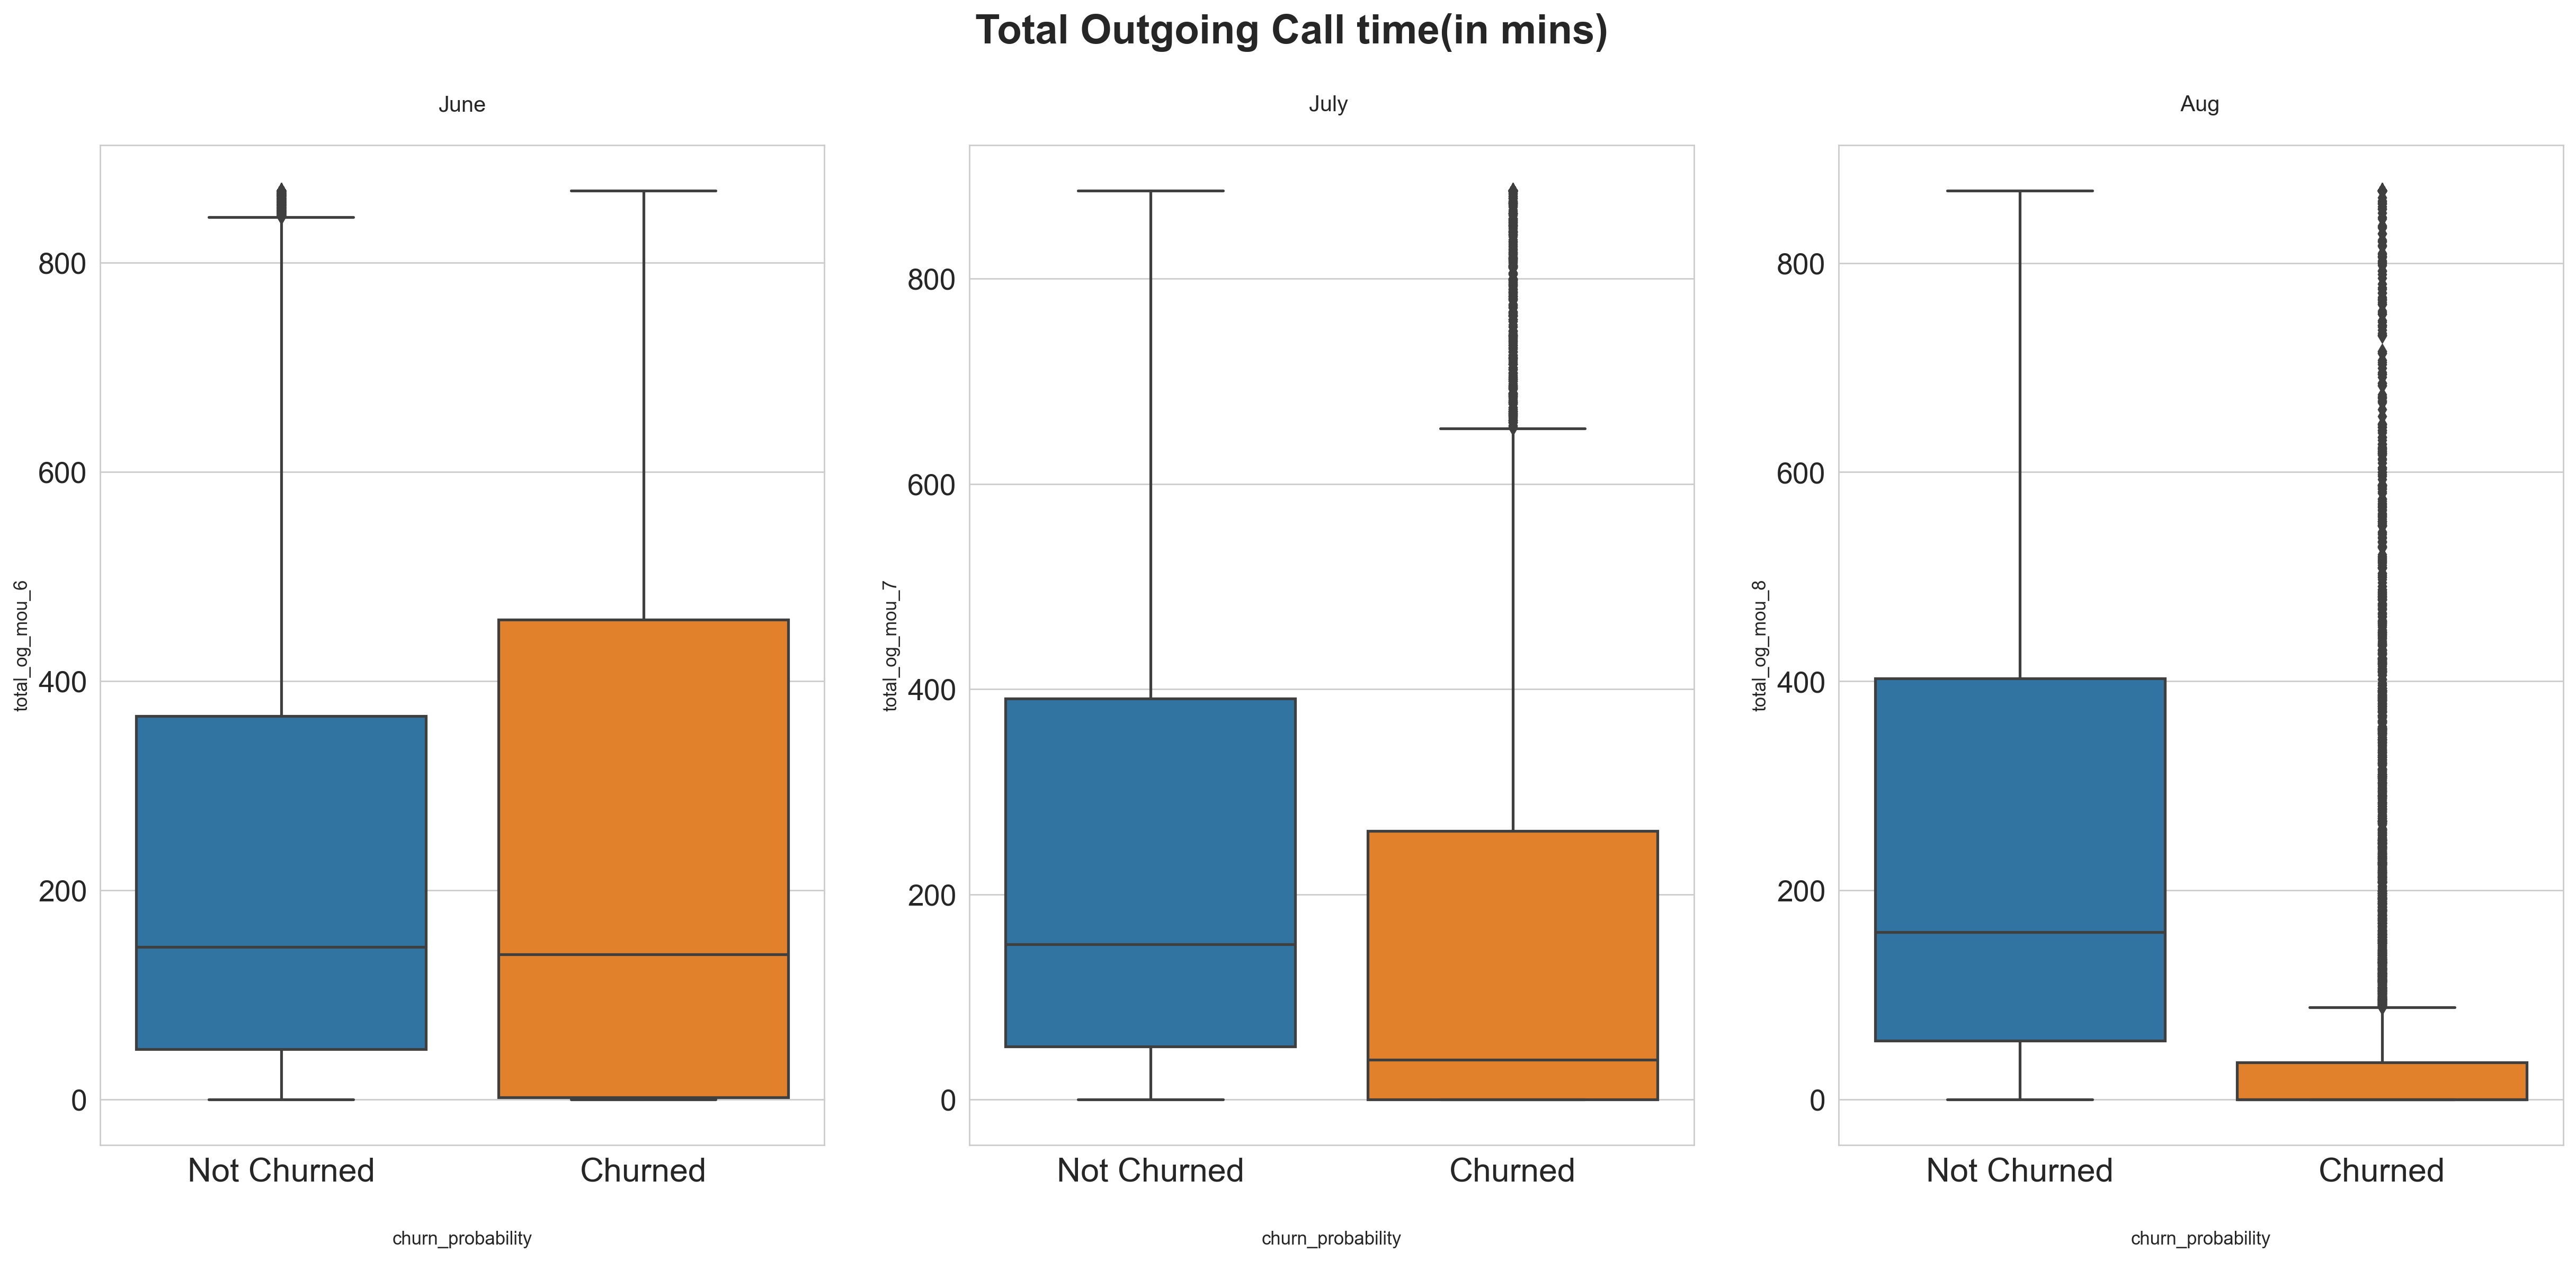

In [38]:
# see usage of the calls vary with months
quartertlyboxplot('total_og_mou', 'Total Outgoing Call time(in mins)')

# INSIGHT: churned customers spent significantly lesser time on outgoing calls in last 2 month

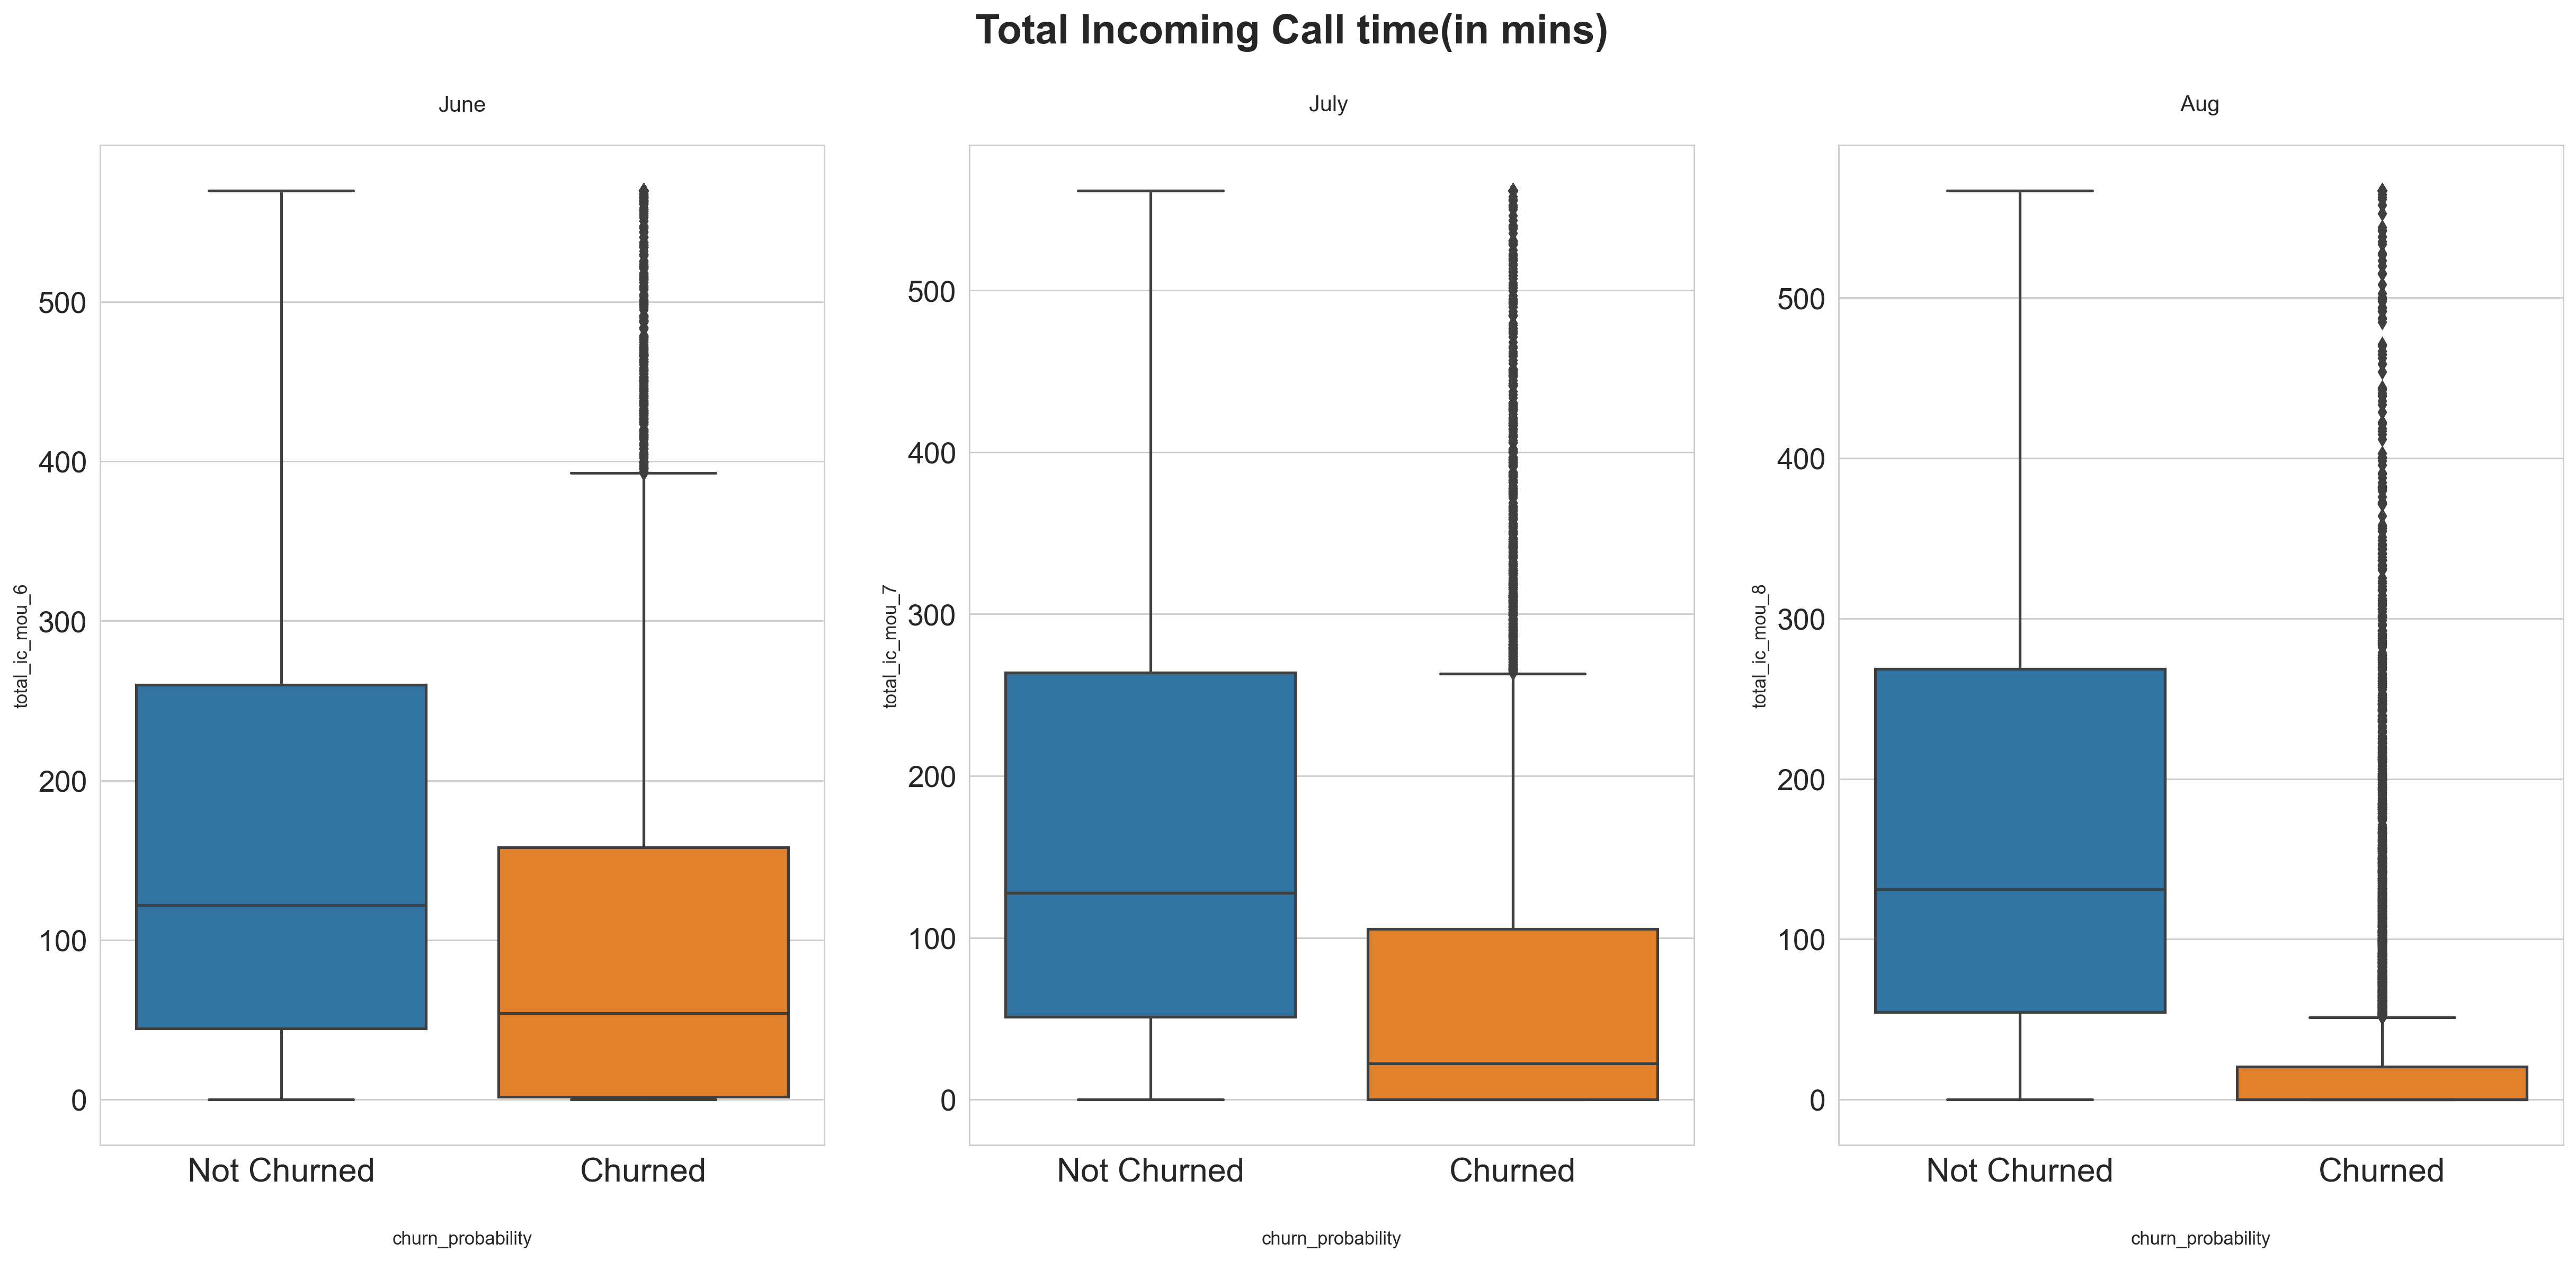

In [39]:
# see usage of the calls vary with months
quartertlyboxplot('total_ic_mou', 'Total Incoming Call time(in mins)')

# INSIGHT: churned customers spent significantly lesser time on incoming calls  in last 2 months

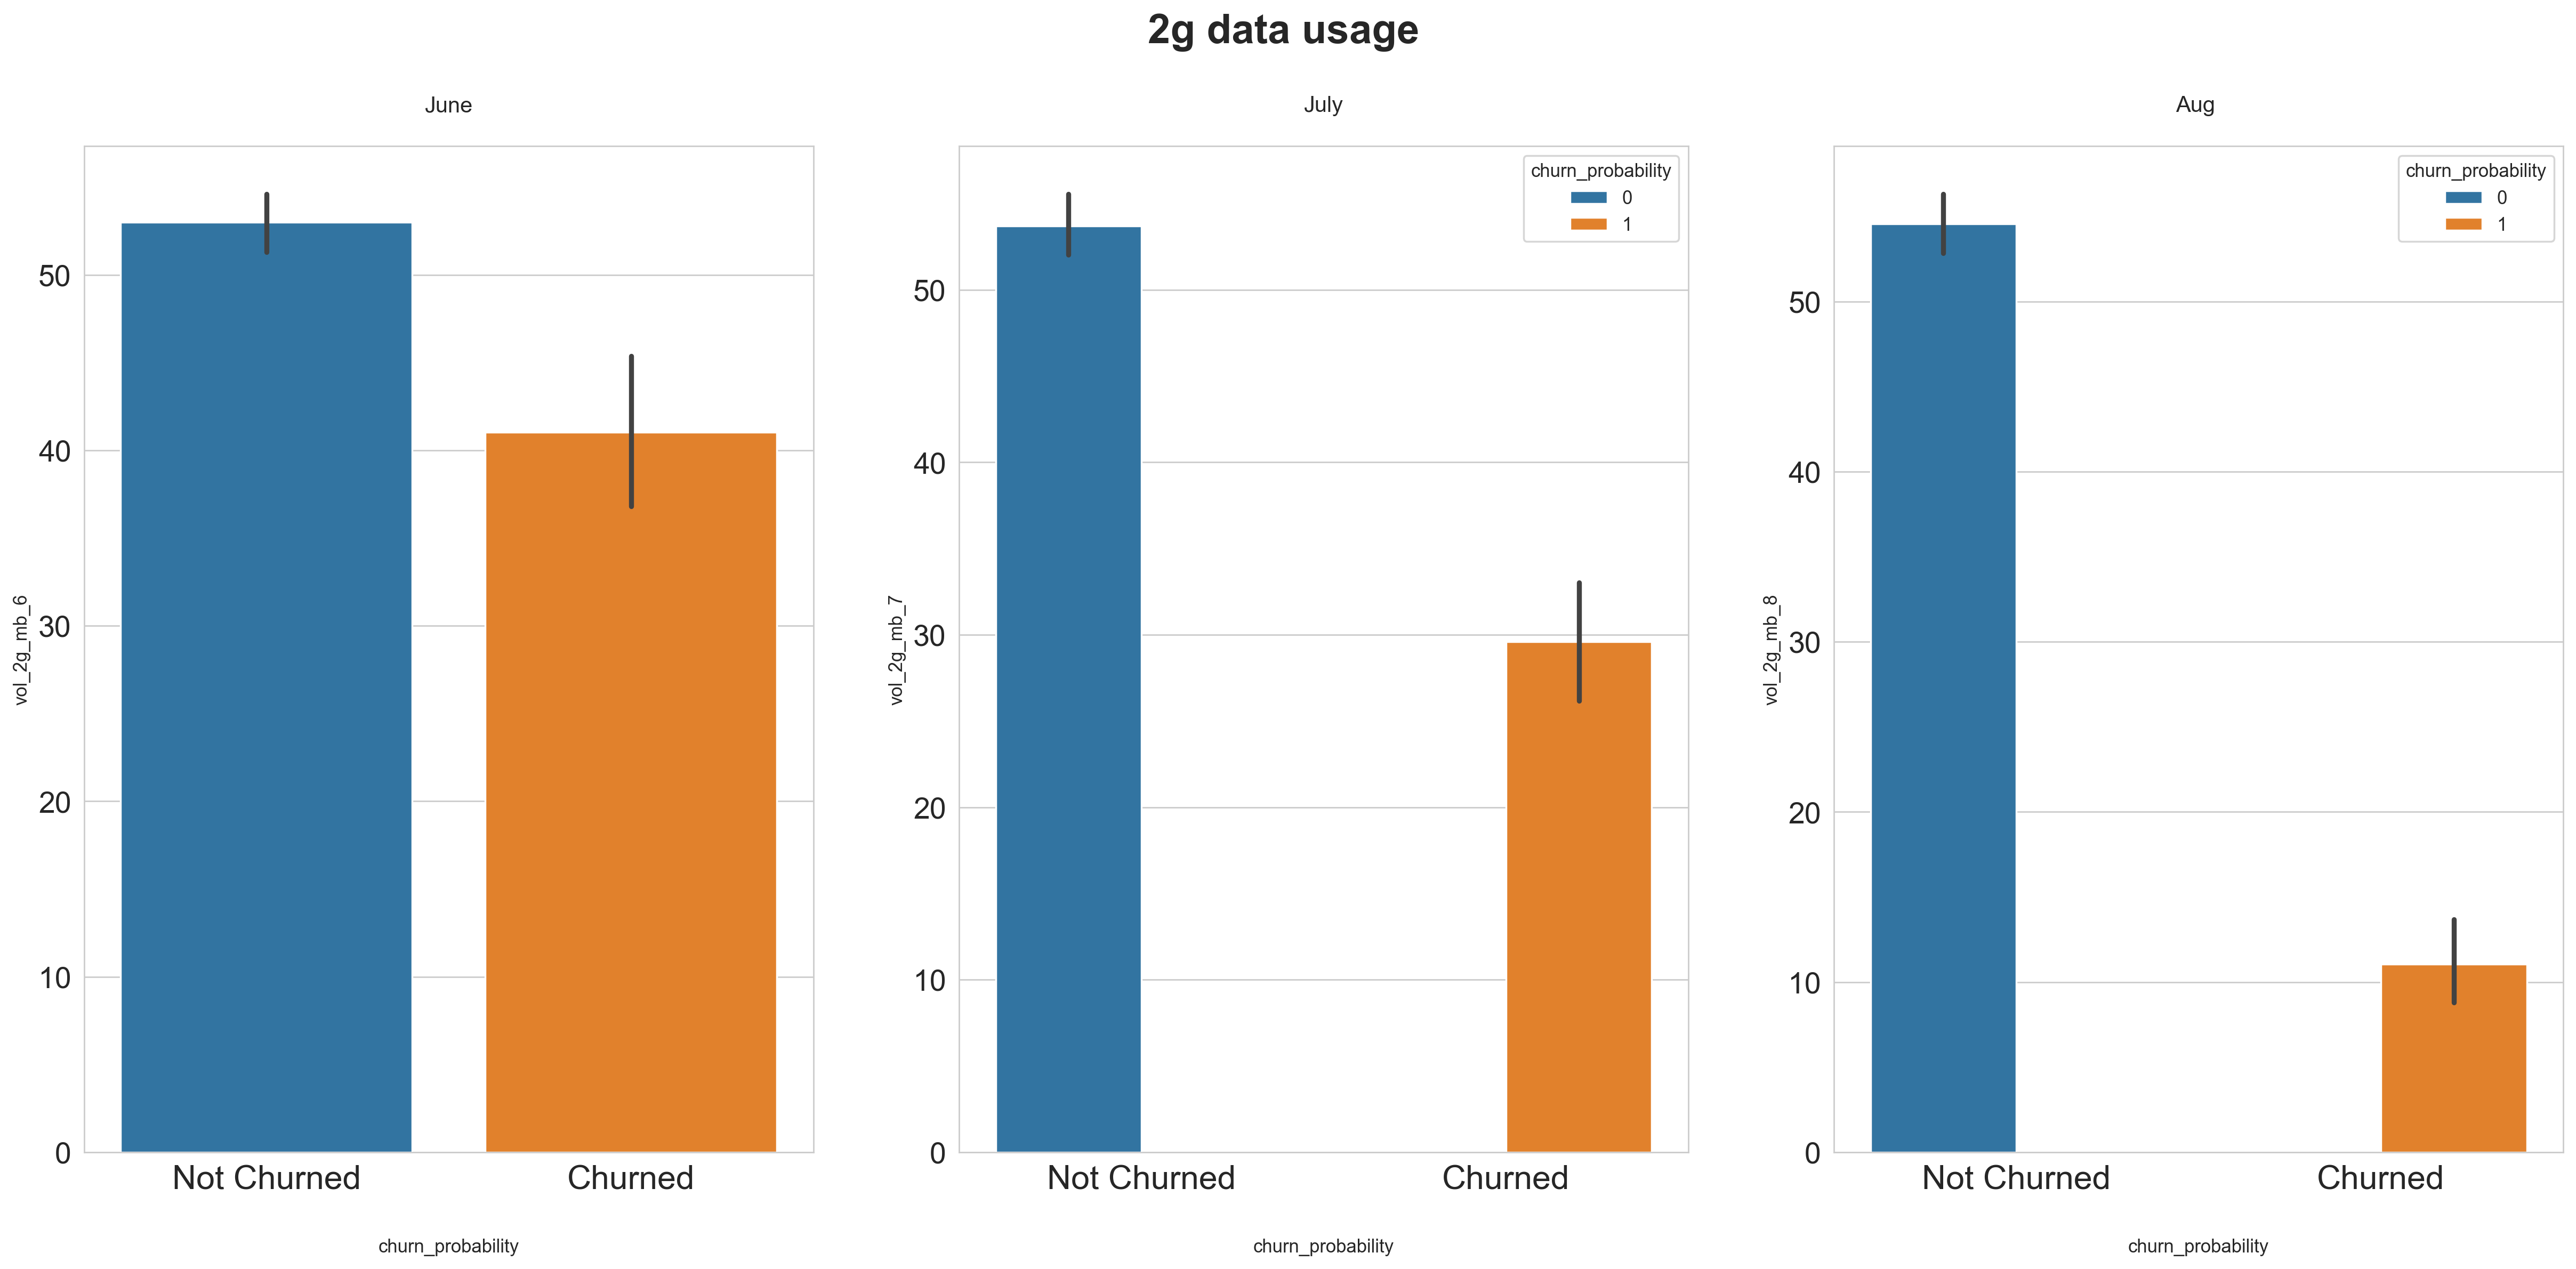

In [40]:
# 2g data usage
quartertlybarplot('vol_2g_mb', '2g data usage')
# churned customers used significantly less 2g data in last months

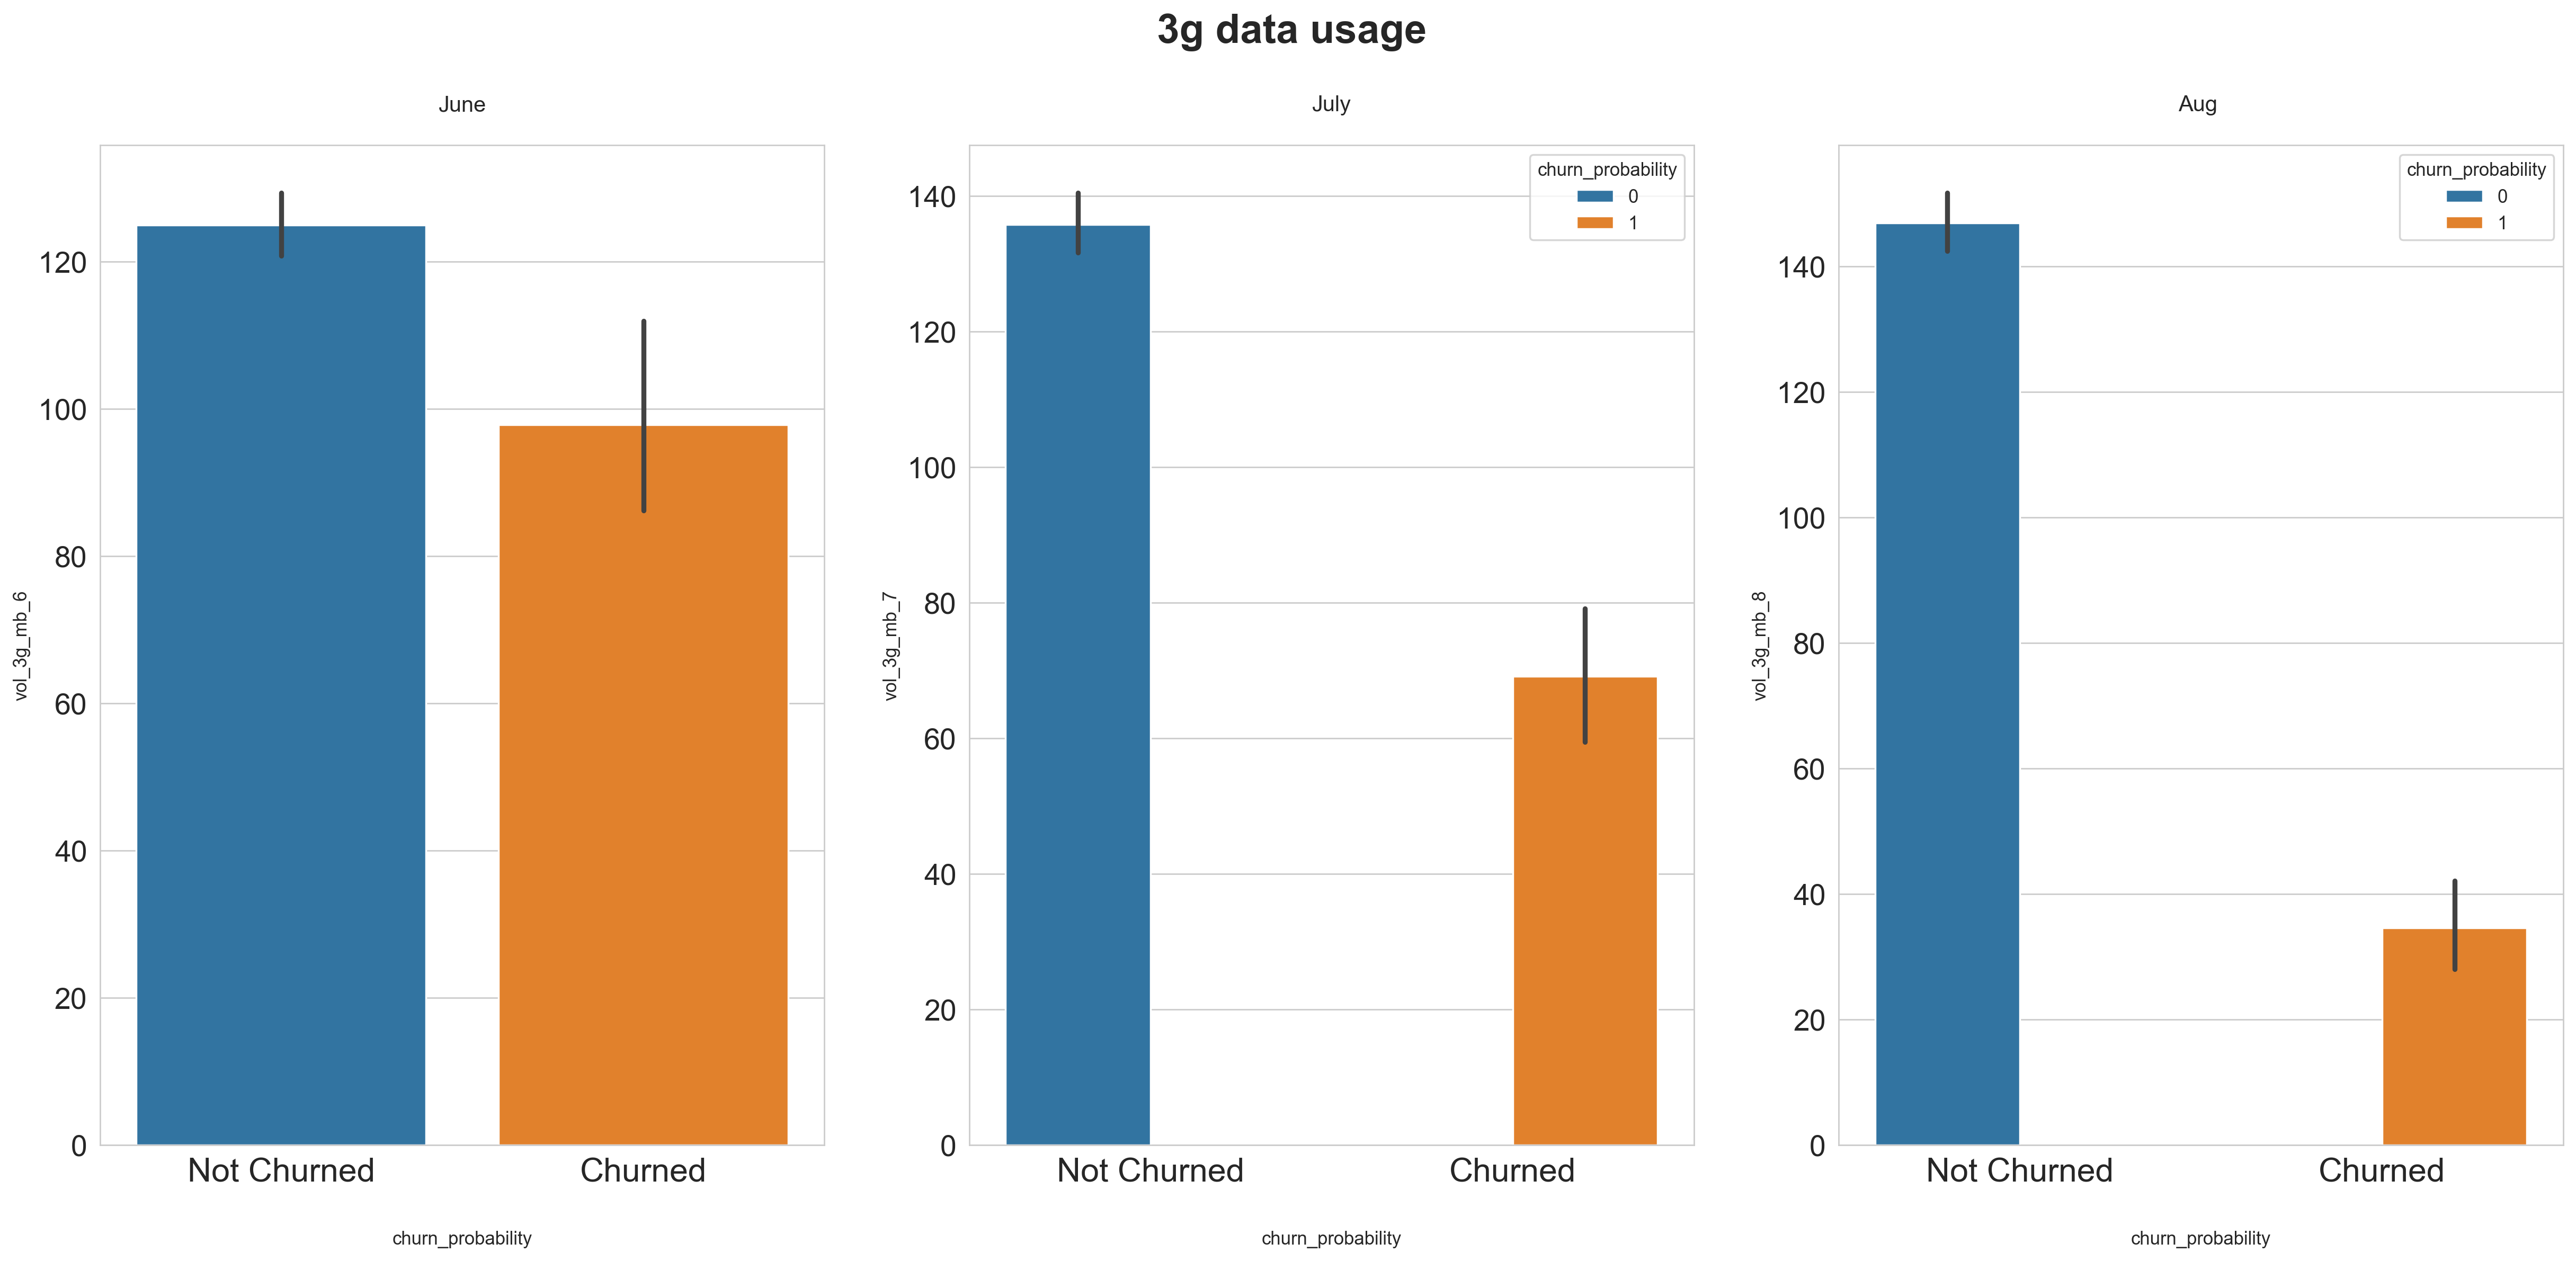

In [41]:
# 3g data usage
quartertlybarplot('vol_3g_mb', '3g data usage')
# churned customers show a significant cosistent decrease in 3g data usage over the time

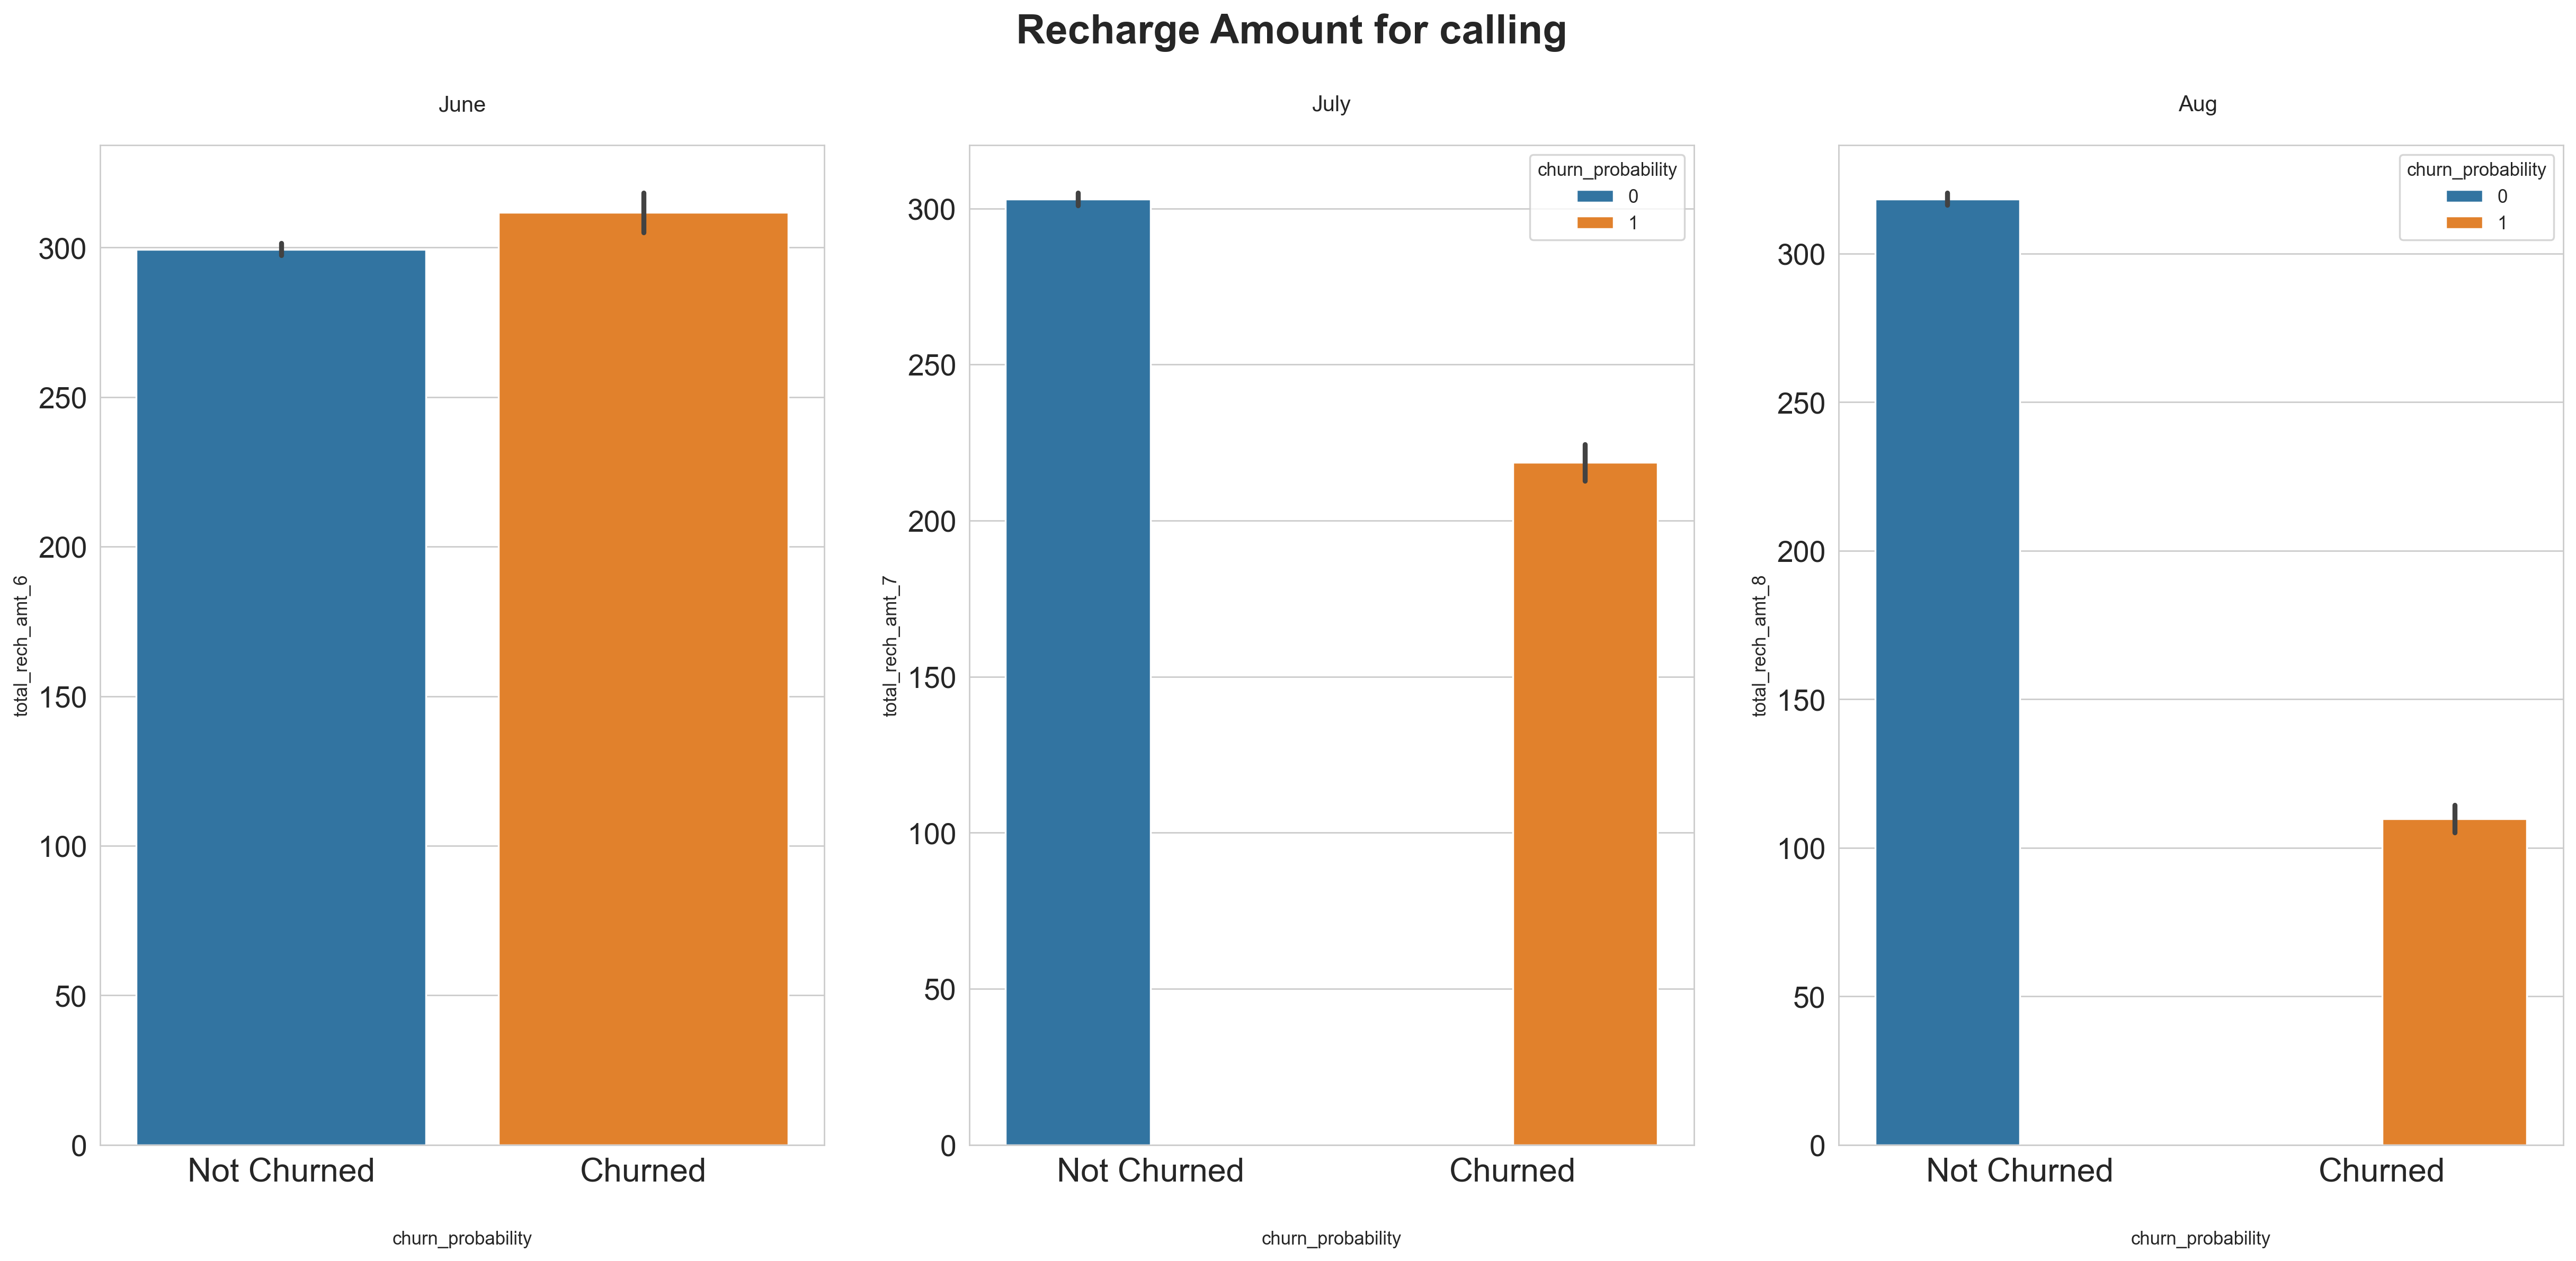

In [140]:
# calling  recharge amount usage
quartertlybarplot('total_rech_amt', 'Recharge Amount for calling')
# churned customers recharged significantly lower amount in last month

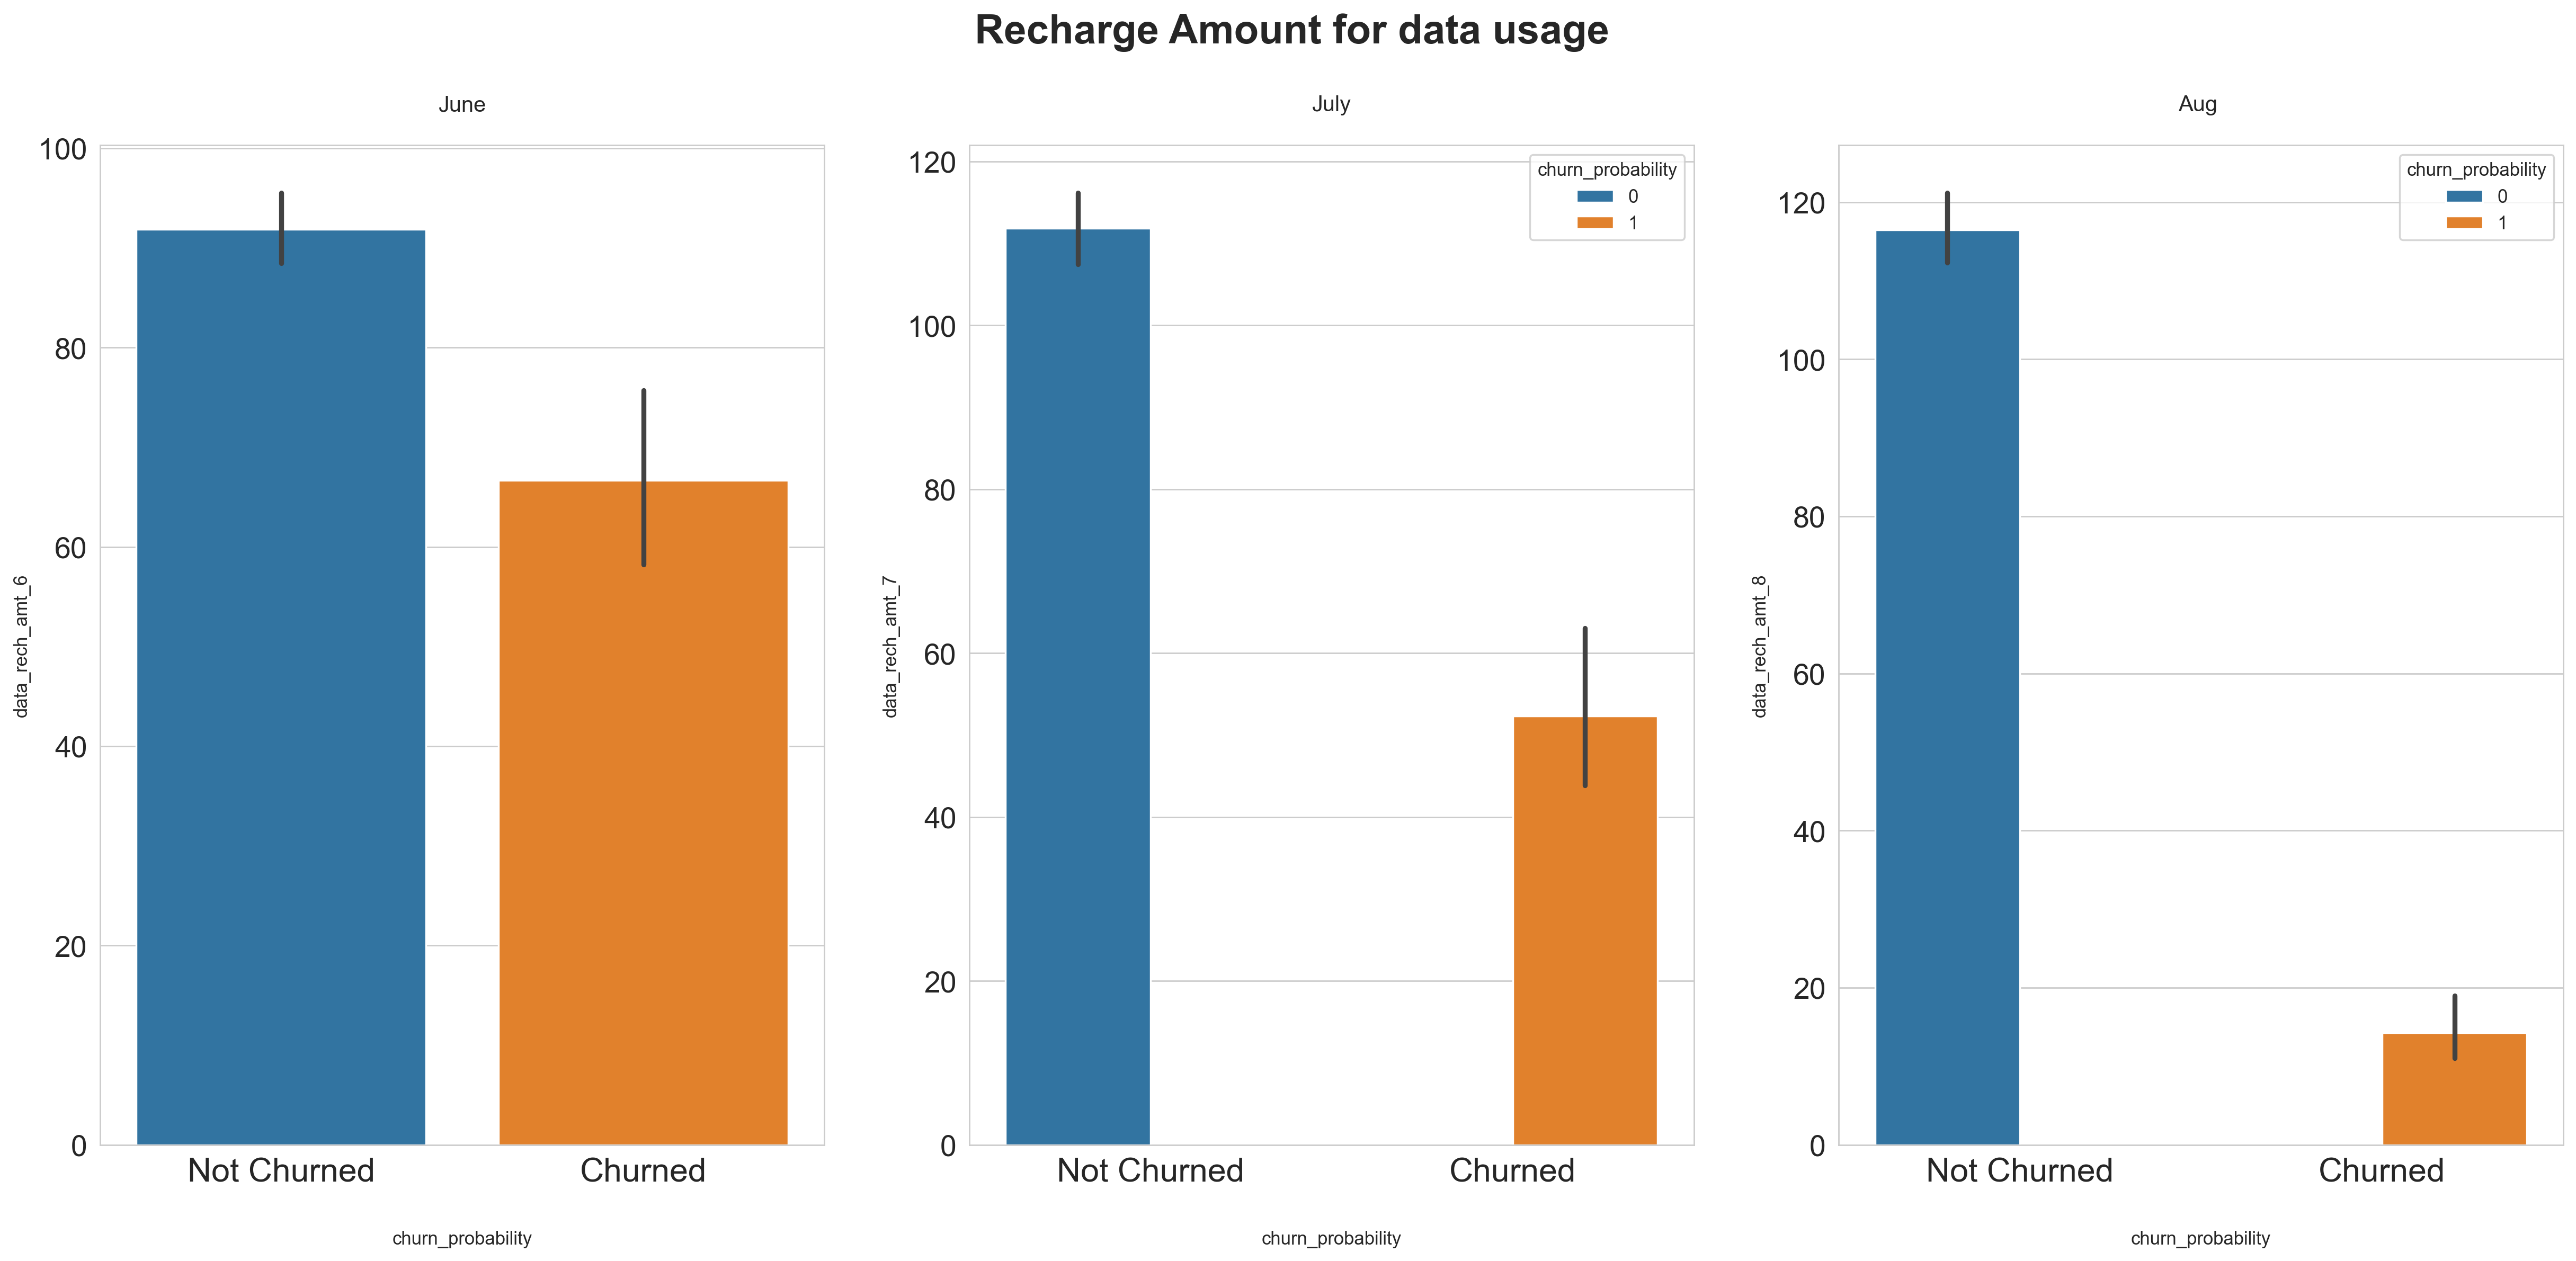

In [316]:
# calling  data recharge amount usage
quartertlybarplot('data_rech_amt', "Recharge Amount for data usage")
# churned customers show a significant cosistent decrease in recharge amount over the time

In [47]:
#Age on network analysis
telecom_df['aon'].describe()

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
25%        468.000000
50%        868.000000
75%       1813.000000
max       4337.000000
Name: aon, dtype: float64

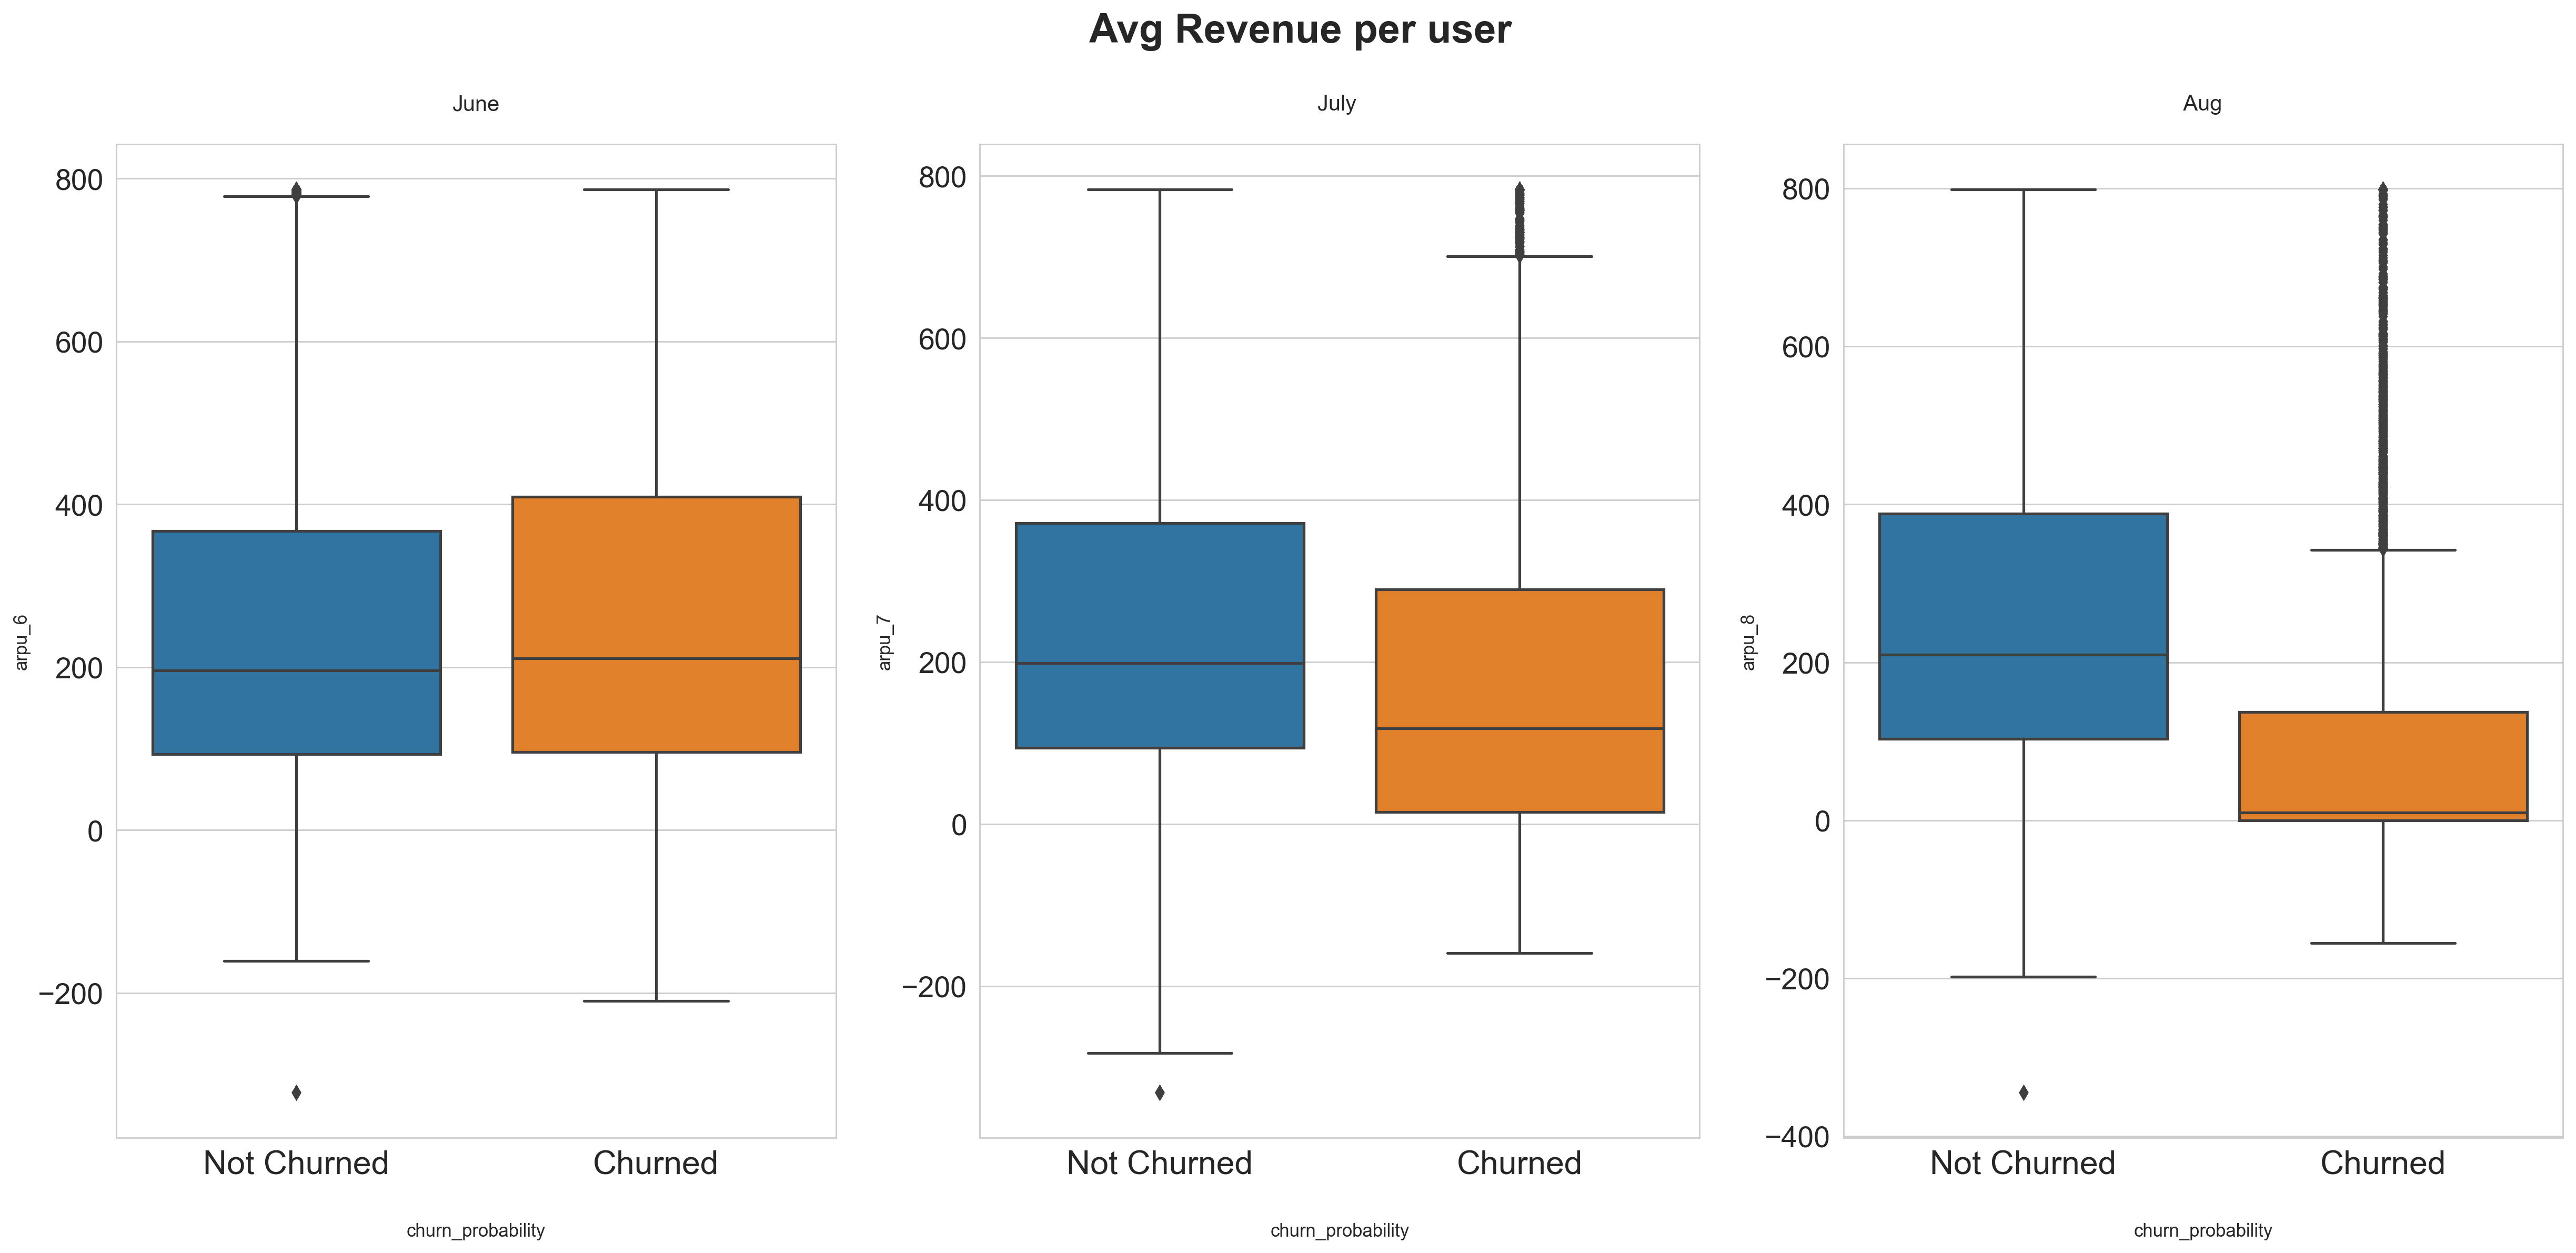

In [142]:

quartertlyboxplot('arpu', 'Avg Revenue per user')

# churned customers caused low revenue in last month with network

In [49]:
#let us create age buckets
def age_bracket(x):  
    year = round(x/365)    
    age_bracket = '0'
    if(year <1):
        age_bracket = 'new'
    elif(year <4):
         age_bracket = 'getting on'
    elif(year <7):
         age_bracket = 'vetran'
    else:
         age_bracket = 'timeless'
    return   age_bracket  

age_df = pd.DataFrame()
age_df['churn_probability']= telecom_df['churn_probability']
age_df['age_network'] = telecom_df['aon'].apply(age_bracket) 
age_df['age_network'].value_counts().index

Index(['getting on', 'vetran', 'timeless', 'new'], dtype='object')

In [50]:
age_df.columns

Index(['churn_probability', 'age_network'], dtype='object')

In [149]:
sns.histplot?

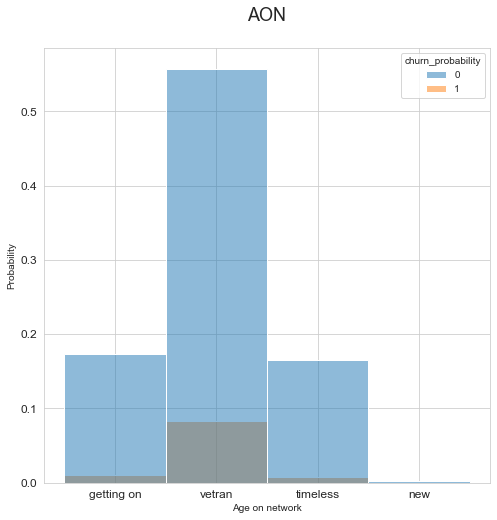

In [157]:
plt.figure(figsize=(8,8))
xlabels = age_df['age_network'].value_counts().index
ax2= sns.histplot( data = age_df , x= 'age_network' , hue = 'churn_probability', stat = 'probability')
ax2.set_title('AON\n', fontsize=18)
ax2.set_xticklabels(labels=xlabels, fontsize=12)
ax2.set_xlabel('Age on network')
plt.yticks(fontsize=12)
plt.show()

# INSIGHT: The customers who are on the network more than 7 yeras have higher probability to churn than others

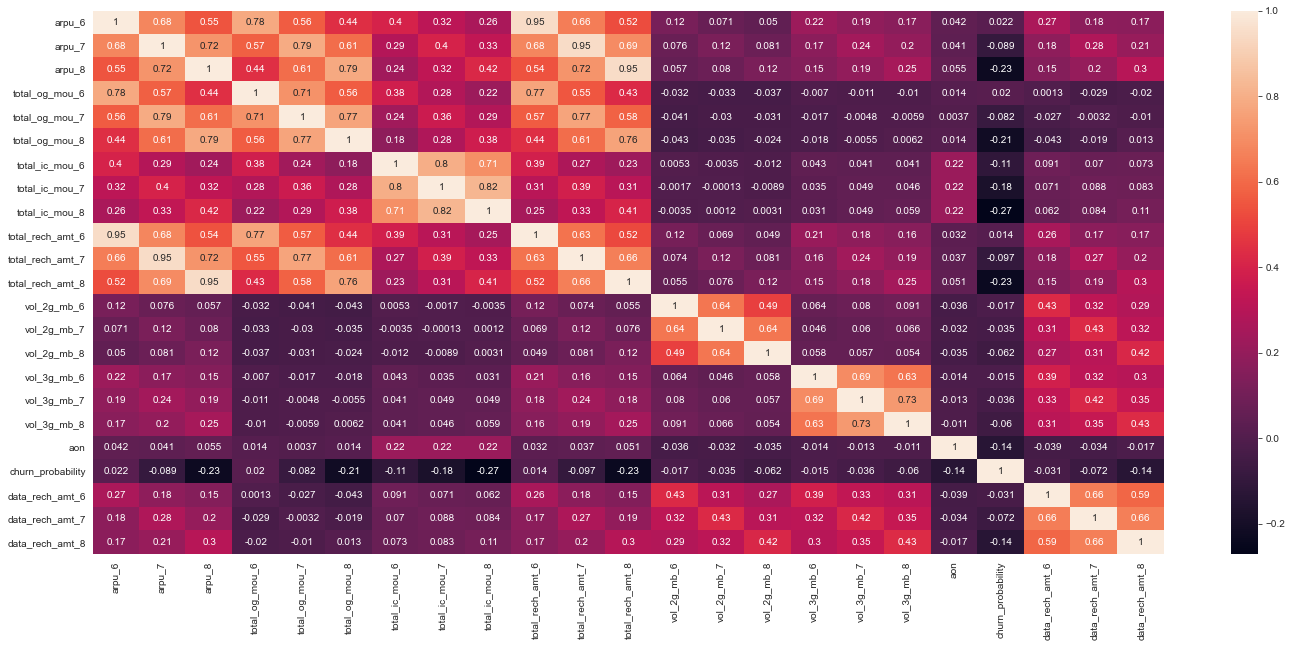

In [143]:
# correlation betweeen 3g data

plt.figure(figsize=(24,10))
sns.set_style("whitegrid")
sns.heatmap( telecom_df2.corr(), annot= True)
plt.show()


# data usage and various 3g services are co-related.also given a number of features are aggregation of others, it is natural to see data correlation

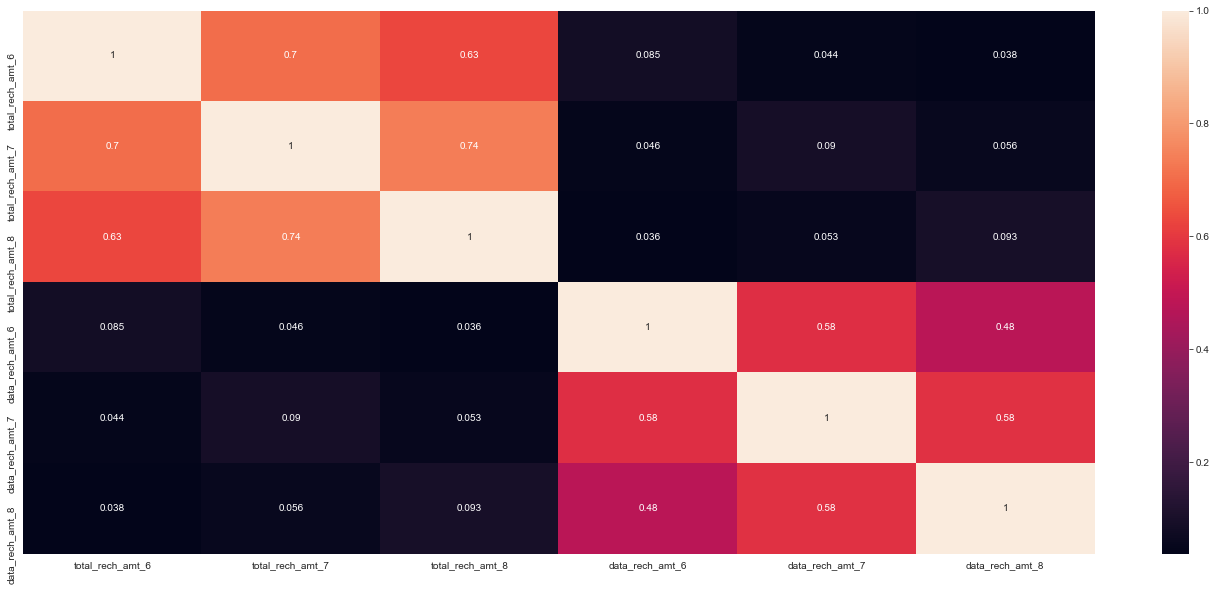

In [291]:
# correlation betweeen recharge amount

data_2g = [col for col in telecom_df2 if (('_rech' in col) & ('_amt' in col)) ]
plt.figure(figsize=(24,10))
sns.set_style("whitegrid")
sns.heatmap( telecom_df[data_2g].corr(), annot= True)
plt.show()


In [54]:
telecom_df2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,churn_probability,data_rech_amt_6,data_rech_amt_7,data_rech_amt_8
id,,,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,77,65,10,0.0,0.00,0.00,0.0,0.00,0.0,1958,0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,0,145,50,0.0,352.91,0.00,0.0,3.96,0.0,710,0,0.0,45.0,0.0
2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,70,120,0,0.0,0.00,0.00,0.0,0.00,0.0,882,0,0.0,0.0,0.0
3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,160,240,130,0.0,0.00,0.00,0.0,0.00,0.0,982,0,0.0,0.0,0.0
4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,290,136,122,390.8,308.89,213.47,0.0,0.00,0.0,647,0,22.5,45.0,60.0


In [42]:
def display_metrics(y_test, y_test_pred):
    
    #create confusion matrix
    cm = confusion_matrix(y_test,y_test_pred)
    print("Confusion matrix:: \t\n\n",cm)

    # cheking accuracy
    print("Accuracy score::", round(accuracy_score(y_test, y_test_pred),3))

    #checking sesitivity 
    print("Sensitivity  score:: \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(3))

    #checking  specificity
    print("Specificity score:: \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(3))

    print("Area under the curve:: \t",round(roc_auc_score(y_test,y_test_pred),2))
    
    

### 4. Data preprocessing for modelling

#### 4.1 Split train and test data

In [43]:
telecom_df2.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,churn_probability,data_rech_amt_6,data_rech_amt_7,data_rech_amt_8
id,,,,,,,,,,,,,,,,,,,,,,,
0,31.277,87.009,7.527,81.21,221.68,3.63,11.84,53.04,40.56,77,65,10,0.0,0.00,0.00,0.0,0.00,0.0,1958,0,0.0,0.0,0.0
1,0.000,122.787,42.953,0.00,30.73,31.66,3.44,39.44,25.04,0,145,50,0.0,352.91,0.00,0.0,3.96,0.0,710,0,0.0,0.0,0.0
2,60.806,103.176,0.000,56.49,99.36,0.00,124.29,33.83,36.64,70,120,0,0.0,0.00,0.00,0.0,0.00,0.0,882,0,0.0,0.0,0.0
3,156.362,205.260,111.095,76.03,95.98,53.84,95.11,50.18,83.84,160,240,130,0.0,0.00,0.00,0.0,0.00,0.0,982,0,0.0,0.0,0.0
4,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,290,136,122,390.8,308.89,213.47,0.0,0.00,0.0,647,0,1225.0,1146.0,852.0


In [44]:
print('The % of churned data in telecom data is ', telecom_df['churn_probability'].sum()*100/telecom_df.shape[0])

The % of churned data in telecom data is  10.188716981671167


In [73]:
X = telecom_df2.drop('churn_probability', axis =1)
y = telecom_df2['churn_probability']

In [74]:
y.value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100 )

In [76]:
print(X_train.shape , X_test.shape) 

(48999, 22) (21000, 22)


#### 4.2 Scale data

In [77]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

#### Logistic modelling

In [78]:
lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)


LogisticRegression(random_state=100)

In [79]:
y_test_pred = lr.predict(X_test)
display_metrics(y_test, y_test_pred)

## the low sensitivity is resulted by the skewed data

Confusion matrix:: 	

 [[18684   217]
 [ 1691   408]]
Accuracy score:: 0.909
Sensitivity  score:: 	 0.194
Specificity score:: 	 0.989
Area under the curve:: 	 0.59


In [80]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 100 )                 
X_sampled, y_sampled = smote.fit_resample(X, y)

In [81]:
# split sampled data again
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled,y_sampled, test_size=0.3, random_state=100 )

In [82]:
# scale the data again
X_train = sc.fit_transform(X_train_sampled)
X_test  = sc.transform(X_test_sampled)
y_train = y_train_sampled
y_test = y_test_sampled

In [83]:
print('The % of churned data in telecom data is ',
      y_train.sum()*100/ y_train.shape[0])

The % of churned data in telecom data is  50.062655214052995


In [84]:
#building model
lr = LogisticRegression(random_state = 100)
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

In [85]:
X_test.shape

(37622, 22)

In [86]:
display_metrics(y_test_pred, y_test_pred)

## the perfect metric shows overfitting, need to take care of collinearity

Confusion matrix:: 	

 [[17145     0]
 [    0 20477]]
Accuracy score:: 1.0
Sensitivity  score:: 	 1.0
Specificity score:: 	 1.0
Area under the curve:: 	 1.0


#### 4.3 PCA- to reduce dimensionality

In [87]:
pca = PCA(random_state =100)
X_train_pca =  pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [88]:
pca.components_

array([[ 2.74119874e-01,  3.37076844e-01,  3.13812477e-01,
         2.46483582e-01,  3.04416211e-01,  2.89613698e-01,
         2.02202630e-01,  2.43413069e-01,  2.29427025e-01,
         2.75422642e-01,  3.32347422e-01,  3.04596058e-01,
         3.68513991e-02,  5.33567425e-02,  5.25820787e-02,
         7.92589235e-02,  9.66609283e-02,  9.74744299e-02,
         5.72603343e-02,  4.07381080e-02,  5.66192668e-02,
         5.79263461e-02],
       [-3.84017392e-02, -1.23024382e-02,  2.17019714e-02,
        -1.63180594e-01, -1.48121763e-01, -1.03656546e-01,
        -7.43216854e-02, -6.83796538e-02, -3.96359546e-02,
        -3.96528479e-02, -9.99348469e-03,  2.44142335e-02,
         3.28479131e-01,  3.52237745e-01,  3.28404198e-01,
         2.39352207e-01,  2.58185205e-01,  2.56902318e-01,
        -4.38219049e-02,  3.61249821e-01,  3.78043368e-01,
         3.45609345e-01],
       [ 8.30893323e-02,  2.48071408e-02, -2.30525924e-03,
        -7.92591596e-03, -5.60181703e-02, -7.46515299e-02,
    

In [89]:
# Let us also look at the variance ratio
var_ratio = np.round((pca.explained_variance_ratio_) * 100,2)
var_ratio

array([29.81, 13.74,  9.46,  9.16,  7.59,  5.8 ,  3.96,  3.7 ,  3.11,
        2.24,  2.05,  1.81,  1.66,  1.43,  1.21,  1.12,  0.62,  0.59,
        0.39,  0.25,  0.19,  0.13])

In [90]:
cum_var = np.cumsum(var_ratio)
cum_var

array([ 29.81,  43.55,  53.01,  62.17,  69.76,  75.56,  79.52,  83.22,
        86.33,  88.57,  90.62,  92.43,  94.09,  95.52,  96.73,  97.85,
        98.47,  99.06,  99.45,  99.7 ,  99.89, 100.02])

#### SCREE PLOT

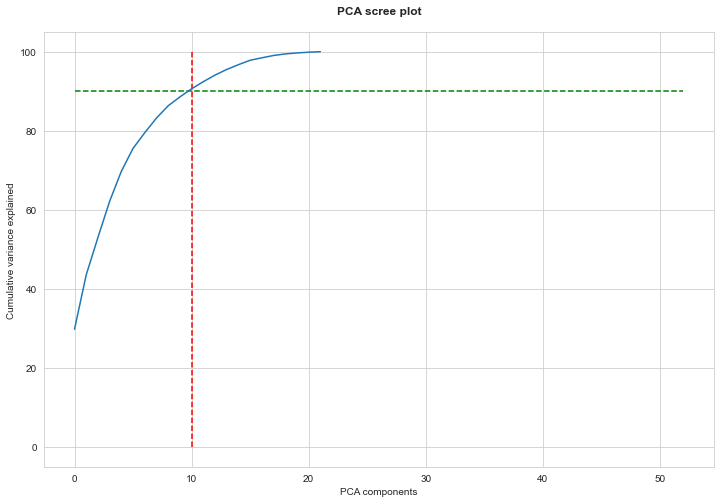

In [92]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=10, ymax=100, ymin=0, colors="r", linestyles="--")
plt.hlines(y=90, xmax=52, xmin=0, colors="g", linestyles="--")
plt.plot(cum_var)
plt.title('PCA scree plot\n', fontsize =12, fontweight = 'bold' )
plt.xlabel('PCA components')
plt.ylabel("Cumulative variance explained")
plt.show()


## The elbow of cumulative variance plot shows first 10 components cover more than 90% of the variance in data. We'll use these to build our model

#### 4.4 Incremental PCA

Let us Build the dataframe using Incremental PCA for better efficiency.


In [95]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 10)
X_train_pca = pca_final.fit_transform(X_train)

In [96]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (87782, 22)
Size of dataset after PCA is: (87782, 10)


In [97]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.013 , min negative corr:  -0.001


In [98]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(37622, 10)

### 5. Model Building

Let us now build various models on this PCA Transformed(X_test_pca, X_train_pca) to predict churn

#### Model 5.1- PCA and Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,
                         random_state = 100)

In [100]:
print(X_train_pca.shape, y_train.shape)
print(X_test_pca.shape, y_test.shape)

(87782, 10) (87782,)
(37622, 10) (37622,)


In [101]:
# Training the model on the data
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [102]:
#prediction on test data
y_test_pred = lr.predict(X_test_pca)


In [103]:
display_metrics(y_test, y_test_pred)

Confusion matrix:: 	

 [[14201  4665]
 [ 3380 15376]]
Accuracy score:: 0.786
Sensitivity  score:: 	 0.82
Specificity score:: 	 0.753
Area under the curve:: 	 0.79


#### Model 2- PCA and SVM

In [69]:
print(X_train_pca.shape, y_train.shape)
print(X_test_pca.shape, y_test.shape)

(48999, 6) (48999,)
(21000, 6) (21000,)


In [ ]:
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf', random_state = 100)

# fit
non_linear_model.fit(X_train_pca, y_train)

# predict
y_pred = non_linear_model.predict(X_test_pca)

In [ ]:
display_metrics(y_test, y_pred)

#### Model 5.3: PCA and Random Forest

#### Default Hyperparameters
Fitting a random forest model with the default hyperparameters will come first.

In [104]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(random_state =100, n_jobs=-1, n_estimators = 150, max_features = 10 )

In [105]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(max_features=10, n_estimators=150, n_jobs=-1,
                       random_state=100)

In [106]:
# Making predictions
y_test_pred = rfc.predict(X_test_pca)

In [107]:
display_metrics(y_test, y_test_pred)

Confusion matrix:: 	

 [[17024  1842]
 [ 1366 17390]]
Accuracy score:: 0.915
Sensitivity  score:: 	 0.927
Specificity score:: 	 0.902
Area under the curve:: 	 0.91


let's examine the list of hyperparameters that we can adjust to enhance model performance.

### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [379]:
#Note: The Below GridSearch Step will take almost 2 hours to run.
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [2,4],
    'min_samples_leaf': range(10, 20,2 ),
    'min_samples_split': range(20, 50,10),
    'n_estimators': [100,200], 
    'max_features': [10, 15]}
# Create a base model
rf = RandomForestClassifier(random_state = 100,  n_jobs=-1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, error_score='raise')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],n_estimators =grid_search.best_params_['n_estimators'], random_state=100)

In [ ]:
# fit  <<<<<<<<<<<<<<<<<<<<<<
rf2.fit(X_train_pca,y_train)

In [ ]:
# predict
predictions = rf2.predict(X_test_pca)

In [ ]:
display_metrics(y_test, predictions)

#### Model 5.4: PCA and AdaBooost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier

In [ ]:
stump = RandomForestClassifier(random_state =100)

In [ ]:
adaboost = AdaBoostClassifier (estimator = stump, n_estimators  = 150, random_state =42) 

In [ ]:
adaboost.fit(X_train_pca, y_train )

In [ ]:
y_test_pred = adaboost.predict(X_test_pca)

In [ ]:
display_metrics(y_test,y_test_pred)

#### Model 5.5: PCA and XGBoost Classifier

In [365]:
import xgboost
from xgboost import XGBClassifier

In [366]:
# default parameters

xb_model = XGBClassifier(n_estimators = 100, njobs =-1 , objective = "binary:logistic")

In [367]:
xb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, njobs=-1,
              num_parallel_tree=None, ...)

In [368]:
y_test_pred = xb_model.predict(X_test_pca) 

In [369]:
display_metrics(y_test,y_test_pred)

Confusion matrix:: 	

 [[16483  2383]
 [ 2613 16143]]
Accuracy score:: 0.867
Sensitivity  score:: 	 0.861
Specificity score:: 	 0.874
Area under the curve:: 	 0.87


### 6. Model selection 

##### 6.1 Stats
1.  Logistic Regression with PCA:

 [[14201  4665]
 [ 3380 15376]]
- Accuracy score:: 0.786
- Sensitivity  score:: 	 0.82
- Specificity score:: 	 0.753
- Area under the curve:: 	 0.79


2. SVM with PCA :: 	


[[16366  2500]
 [ 3343 15413]]
- Accuracy score:: 0.845
- Sensitivity  score:: 	 0.822
- Specificity score:: 	 0.867
- Area under the curve:: 	 0.84


3. Random Forest with PCA:

[[17024  1842]
 [ 1366 17390]]
- Accuracy score:: 0.915
- Sensitivity  score:: 	 0.927
- Specificity score:: 	 0.902
- Area under the curve:: 	 0.91
 

4. ADABoost with PCA::
	

[[17171  1695]
 [ 1302 17454]]
- Accuracy score:: 0.92
- Sensitivity  score:: 	 0.931
- Specificity score:: 	 0.91
- Area under the curve:: 	 0.92

5. XGBoost wtith PCA::

[[16483  2383]
 [ 2613 16143]]
- Accuracy score:: 0.867
- Sensitivity  score:: 	 0.861
- Specificity score:: 	 0.874
- Area under the curve:: 	 0.87

#### 6.2  Final model

As the purpose of the case study is to maximise the customer retention by identifying the max number of customers who have probability of getting churned. Even if some of customers are incorrectly classified as churning, Tthe expense of churning is much more for the company than a few false positives.

In order to do that, we need to ensure that no positive cases are missed out i.e. maximise  True positives. Hence 
we'll use <b>Recall/Sensitivity</b> for the telecom churn study. 
    
    
On the basis of highest recall/sensitivity score, we'll select <b>AdaBoost</b> model to predict the customer's churning rate.


### 7 Test predictions

##### 7.1 Data preparation of TEST data for prediction using our best model

In [ ]:
test_df = pd.read_csv("test.csv")

In [ ]:
test_out = pd.DataFrame()
test_out['id'] = test_df['id']
test_df.drop('id', axis = 1, inplace = True)

In [ ]:
# While all other columns have utilised the integers "6,7,8,9" to indicate month name, last 3 columns representing volume-based users have month specified in their names.
# 2 recgharge name columns are abreviated as *rch* ...revert to *rech* to keep these consisent with others   
test_df = test_df.rename(columns = {'aug_vbc_3g':'3g_vbc_8','jul_vbc_3g':'3g_vbc_7','jun_vbc_3g':'3g_vbc_6' , 'last_day_rch_amt_6': 'last_day_rech_amt_6',
                          'last_day_rch_amt_7':'last_day_rech_amt_7','last_day_rch_amt_8':'last_day_rech_amt_8'})
## add the new columns
test_df.fillna(0)
test_df['data_rech_amt_6'] = test_df['av_rech_amt_data_6'] * test_df['count_rech_2g_6']
test_df['data_rech_amt_7'] = test_df['av_rech_amt_data_7'] * test_df['count_rech_2g_7']
test_df['data_rech_amt_8'] = test_df['av_rech_amt_data_8'] * test_df['count_rech_2g_8']


In [373]:
#select the columns that were used for model training
new_cols = X_train_sampled.columns
test_df = test_df[new_cols]

# like training data, update test df
test_df.fillna(0, inplace = True)

In [374]:
# test data scaling using scaler fitted earlier on training data
X_test_sc  = sc.transform(test_df)

# build PCA components from the pca model fitted earlier during modeling
test_data = pca_final.transform(X_test_sc)

##### 7.2 test predictions using our best model (Random Forest)

In [378]:
test_predictions = adaboost.predict(test_data)
test_out['churn_probablity'] = test_predictions
test_out.to_csv("sample_pca_ada.csv", sep=',', index = False)

### 8. INFERENCE MODEL (RandomForestClassifier without PCA)

#### Building Decision Tree model using original features

In [375]:
# scale the data again
X_train_infer = sc.fit_transform(X_train_sampled)
X_test_infer  = sc.transform(X_test_sampled)

# build the model and fit it will scaled features
rf_infer = RandomForestClassifier(n_estimators = 100, random_state = 100)
rf_infer.fit(X_train_infer, y_train_sampled)

RandomForestClassifier(random_state=100)

In [376]:
feature_importances = pd.DataFrame({'col':X_train_sampled.columns, 'importance':rf_infer.feature_importances_})

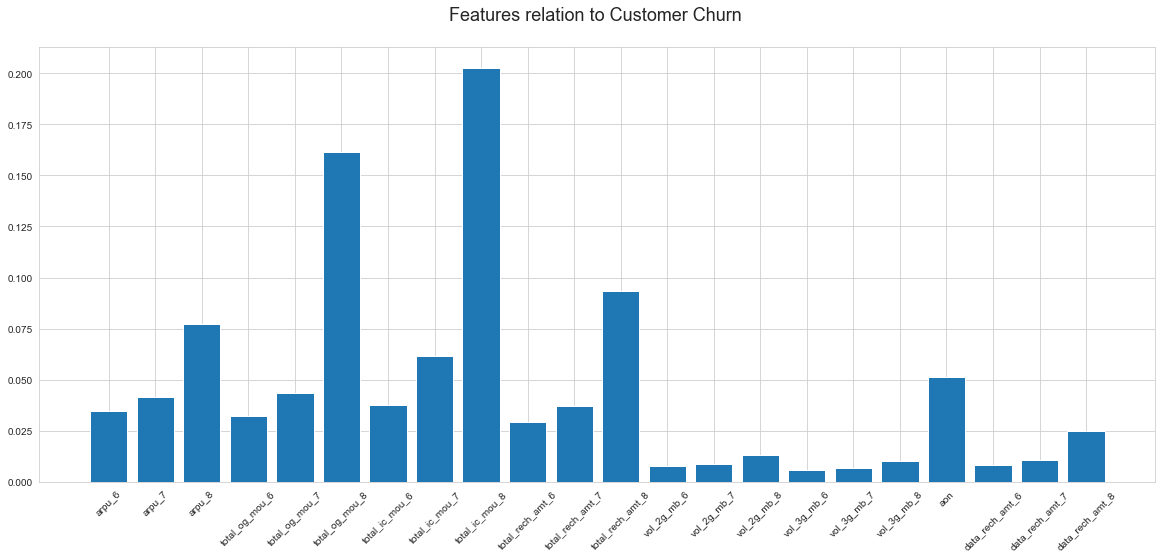

In [377]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
plt.bar(feature_importances['col'], feature_importances['importance'])
plt.title('Features relation to Customer Churn \n ', fontsize = 18)
plt.show()

### Conclusion:

Based on the graph above, the following 5 features indicate the probability of customer churning next month (in descending order):
1. Total time(mins) spent on incoming calls  the last (action) month
2. Total time(mins) spent on outgoing calls in the last (action) month
3. Total recharge amount for calling  last(action) month
4. Average revenue in last(action) month
5. Total time(mins) spent on incoming calls  the last to last month
6. Average time with network.
